*Documento escrito en JupyterLab
<br>
Data Science
<br>
Comisión 22740
<br>
Tutor 
<br>
Octavio Lafourcade
<br>
Profesor 
<br>
Luca Citta Giordano*

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/International_Pok%C3%A9mon_logo.svg/375px-International_Pok%C3%A9mon_logo.svg.png)

# **Proyecto final**

En este notebook se realizará lo que sería la entrega final del curso de Data Science. En este punto, estaremos presentando un Analisis Exploratorio de Datos y el desarrollo de instancias como Data Acquisition, Data Wrangling, la implementación de modelos de clasificación y la optimización de los mismos mediante las herramientras trabajadas durante el curso.

## Índice:

#### 1. Introducción
       1.1. Presentación 
       1.2. Acerca del dataset
       1.3. Objetivos de la investigación
       1.4. Objetivos de la entrega
            1.4.1. Objetivos generales
            1.4.2. Objetivos específicos
       1.5. Grupo de trabajo
       1.6. Diccionario de variables
#### 2. Resumen
#### 3. Preparación del notebook
#### 4. Data Acquisition
#### 5. Análisis exploratorio
        5.1. Tipo de cada columna
        5.2. Número de observaciones y valores ausentes
        5.3. Variable objetivo
        5.4. Preprocesamiento
        5.5. Tratamiento de valores nulos
        5.6. Toma de decisiones para valores nulos
        5.7. Variables numéricas
        5.8. Correlación de variables numéricas
        5.9. Variables cualitativas
        5.10. Identificación de valores duplicados
        5.11. Distribución de total_points
        5.12. Análisis de total_points
        5.13. Label Encoding
        5.14. Correlación de variables
              5.14.1. Matriz de correlación
        5.15. Pairplot entre las variables de mayor correlación
        5.16. Histogramas
#### 6. El dataset
        6.1. Limpieza del dataset
        6.2. Ajustes a la data para construir modelos de clasificación
        6.3. Estandarización de la data
        6.4. Tratamiento de desbalance en la data
        6.5. Asignación de la data de entrenamiento y test
#### 7. Modelos de clasificación clásicos
        7.1. Hiperparametros predeterminados (Default)
        7.2. Aplicación de algoritmo RandomSearch + Cross Validation + Métricas de rendimiento
        7.3. Aplicación de algoritmo GridSearch + Cross Validation + Métricas de rendimiento
        7.4. Tabla resumen
        7.5. ¿Cual es el mejor modelo?
#### 8. AUC-ROC Curve
        8.1. Área under the curve (AUC)
        8.2.  Plot de ROC Curve
#### 9. Modelos de clasificación Boosting
        9.1. XGBoost
        9.2. Tuning de hiperparametros para XGBoost
        9.3. GBC
        9.4. Tuning de hiperparametros para GBC
        9.5. Adaboost
        9.6. Tuning de hiperparametros para Adaboost
#### 10. Conclusiones

## 1. Introducción

### 1.1. Presentación

El presente trabajo se basará en información ficticia sobre la popular y exitosa franquicia de medios Pokémon, que ha alcanzado la televisión, películas, juegos, anime, manga, entre muchos otros.

En lo que respecta a la data contenida se puede decir que:
- Contiene información sobre los Pokémon registrados en la Pokedex.
- Existen Pokémon con Mega Evoluciones las cuales solo tienen lugar en las últimas generaciones.
- Existen variables regionales, esto significa que puede existir un Pokémon diferente en aspecto y/o habilidades.
- Hay Pokemon que tienen distinta forma y cambia sus estadisticas.

### 1.2. Acerca del dataset

El dataset es de acceso público y se puede encontrar en kaggle, en el siguiente link, en su versión más actual, pokedex_(Update_04.21): 

- https://www.kaggle.com/mariotormo/complete-pokemon-dataset-updated-090420?select=pokedex_%28Update_05.20%29.csv 

La información fue recopilada de las siguientes páginas:
- https://pokemondb.net/ 
- https://www.serebii.net/ 

La informacion ha sido recolectada y trabajada por Mario Tormo Romero
- https://www.kaggle.com/mariotormo/

###  1.3. Objetivos de la investigación

Realizar el análisis sobre las variables contenidas en el dataset elegido para posteriormente construir modelos de Machine learning que permitan predecir si un Pokemon es legendario o no lo es.


### 1.4. Objetivos de entrega

**1.4.1. Objetivos Generales**
* Entender el problema de negocio e identificar los elementos a ser considerados para el planteamiento de un Modelo de Data Science.
* Describir los datos de negocio y las relaciones entre datos mediante el Análisis Exploratorio de Datos.
* Elegir el algoritmo de entrenamiento y preparar los datos para el proceso de entrenamiento del modelo.
* Evaluar los indicadores de desempeño predictivo del modelo y realizar optimizaciones.
* Construir una presentación ejecutiva para la alta gerencia mostrando los resultados del modelo.

**1.4.2. Objetivos Específicos**
* Lograr una articulación en equipo y una división de tareas adecuadas a los objetivos.
* Comparar entre los modelos realizados, presentando las distintas medidas y determinar cuál es el mejor

### 1.5. Grupo de trabajo

- Carolina López Davio
- Diego Luciaw
- Fabiana Torres Meza
- Felipe Maldonado

### 1.6. Diccionario de variables

El dataset contiene las siguientes columnas:
- **Pokedex Number** 
> - Descripción: Número o lugar que ocupa un Pokémon en la Pokedex
> - Data type: integer
> - Valores: 1-898 
- **Name**
> - Descripción: El nombre del Pokémon en América
> - Data type: string
- **German_Name** 
> - Descripción: El nombre del Pokémon en alemán
> - Data type: string
- **Japanese_Name**
> - Descripción: El nombre del Pokémon en japonés (Idioma original)
> - Data type: string
- **Generation**
> - Descripción: A qué generación pertenece dicho Pokémon. 
> - Data type: Integer
> - Valores: 1-8 
- **Status**
> - Descripción: Clasificación mayor de tipo de Pokémon, ex: Legendario, Mítico, Sub Legendario , Normal.
> - Data type: string
- **Species** 
> - Descripción: A qué especie pertenece el Pokémon.
> - Data type: string
- **Type_Number**
> - Descripción: Cantidad de tipos que el Pokémon posee.
> - Data type: integer
> - Valores: 1-2
- **Type_1**
> - Descripción: Primer tipo de Pokémon. 
> - Data type: string
> - Dato: Esta variable categórica la poseen todos los Pokémon.
- **Type_2**
> - Descripción: Segundo tipo de Pokémon.
> - Data type: string
> - Dato: Esta variable categórica pueden tenerla sólo algunos Pokémon. Si no poseen un segundo tipo aparece NaN. 
- **Height_m** 
> - Descripción: Altura del Pokémon en metros. 
> - Data type: float
> - Valores: 0,1m - 100m
- **Weight_kg** 
> - Descripción: Peso del Pokémon en kilogramos. 
> - Data type: float
> - Valores: 0,1 kg - 999,9 kg. 
- **Abilities_number**
> - Descripción: Cantidad de habilidades que posee el Pokémon.
> - Data type: integer
> - Valores: 1-3 
- **Ability_1**
> - Descripción: Primera habilidad del Pokémon.
> - Data type: string 
- **Ability_2**
> - Descripción: Segunda habilidad del Pokémon.
> - Data type: string  
- **Total_points**
> - Descripción: Suma de HP, attack, defense, sp_defense, sp_attack y speed.
> - Data type: integer
> - Valores: 175 - 770 total points. 
- **HP**
> - Descripción: Estadística básica de los puntos de salud de los Pokémon.
> - Data type: integer
> - Valores: 1 - 255. 
- **Attack**
> - Descripción: Estadística básica del ataque del Pokémon.
> - Data type: integer
> - Valores: 5-190
- **Defense**
> - Descripción: Estadística básica de la defensa del Pokémon.
> - Data type: integer
> - Valores: 5-250
- **Speed**
> - Descripción: Estadística básica de la velocidad del Pokémon. 
> - Data type: integer
> - Valores: 5-200. 
- **sp_attack**
> - Descripción: Estadística básica del Pokémon.
> - Data type: integer
> - Valores: 10-194
- **sp_defense**
> - Descripción: Estadística básica del Pokémon.
> - Data type: integer
> - Valores: 20-250
- **catch_rate**
> - Descripción: Tasa de captura.
> - Data type: integer
> - Valores:3-255 
- **Base friendship**
> - Descripción: Puntos de amistad.
> - Data type: integer
> - Valores: 0 - 140.
- **Base experience**
> - Descripción: Puntos de experiencia.
> - Data type: integer
> - Valores: 36 - 608.  
- **Growth rate**
> - Descripción: Tasa de crecimiento del Pokémon.
> - Data type: string
- **egg type_number**
> - Descripción: Cantidad de tipos de huevo
> - Data type: integer
> - Valores: 0-2
- **egg type_number_1**
> - Descripción: Tipo de huevo 1
> - Data type: string
- **egg type_number_2**
> - Descripción: Tipo de huevo 2
> - Data type:string
- **percentage_male**
> - Descripción: Probabilidad de encontrar dicho Pokémon macho
> - Data type: float
> - Valores: 0-87.5
- **egg cycle**
> - Descripción: Ciclo de huevo
> - Data type: integer
> - Valores: 5-120
- **Against_**
> - Descripción: Efectividad del Pokémon contra diferentes tipos de Pokémon
> - Data type: float
> - Valores: 0-4


## 2. Resumen

En esta entrega proyecto final se realizaron las etapas de **Data Adquisition**, de **Data Wrangling - EDA** (se quitaron valores nulos, duplicados, se corrigió el índice, entre otros) para asi preparar el dataset y poder construir **modelos de Machine Learning** a partir de el. Fue seleccionada como variable target para realizar la construcción de los modelo, predicciones y optimizaciones una nueva variable introducida llamada **"legendary"** que nos dice si un pokemon es (valor = 1 = True) o no legendario (valor = 0 = False). Los no Legendario corresponden a Pokemon Mítico, Normal y Sublegendario.
<br>
Fueron utilizados *modelos clásicos* de machine learning como lo es **Random Forest**, **SVM**, **Logistic Regression** y **KNN**. Tambien *modelos de boosting* como **Adaboost**, **XGBoost** y **GBC**.
<br>
Fueron construidos variados modelos de Machine Learning en su modalidad de *clasificador* para determinar si un Pokemon es legendario o no lo es. Los algoritmos utilizados son *supervisados (de clasificación)*. 
<br>
Fue calculado **accuracy** mediante Sklearn, el **area bajo la curva (AUC)**, se grafico la **ROC Curve**, se creo la **matriz de confusión** y las **metricas** de la misma (F1, Accuracy, Recall, Precision) mediante **classification report**, se identificaron **los mejores hiperparametros** mediante la implementación de los algoritmos de **GridSearch** y **Random Search** bajo **RepeatedStratifiedKFold**. 
<br>
Como se podra ver mas adelante, para un mejor desempeño de los modelos de machine learning se tuvo que realizar **over-sampling de la clase minoritaria mediante SMOTE** para tratar la **unbalanced data** y **estandarización de valores para el conjunto de prueba**.

## 3. Preparación del notebook

Instalación de librerias esenciales

In [ ]:
# conda install seaborn

In [ ]:
# conda install missingno

In [ ]:
# conda install -c plotly plotly

In [ ]:
# conda install -c conda-forge imbalanced-learn

In [ ]:
# conda install -c anaconda graphviz

In [ ]:
# conda install -c anaconda pydot

In [ ]:
#pip install -U numpy scipy scikit-learn

Importación de las librerias a utilizar

In [ ]:
# Procesamiento de data
import pandas as pd

# Algebra lineal
import numpy as np

# Visualización de data
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid')
%matplotlib inline

# Estadisticos
from numpy import mean
from numpy import std

# Tratamiento de warnings
import warnings
warnings.filterwarnings('ignore')

# Algoritmos
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Selección de la data de train y test
from sklearn.model_selection import train_test_split

# Accuracy y AUC de modelos
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

# Algoritmo SMOTE para oversampling
from imblearn.over_sampling import SMOTE

# CrossValidation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

# Hyperparameters tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Matriz de confusión
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

# Reporte de clasificación y metricas
from sklearn.metrics import classification_report

# Arreglo numerico
from scipy.stats import randint as sp_randint

# Estandarización de la data
from sklearn.preprocessing import StandardScaler

# Modelos de Boosting
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

## 4. Data Acquisition

In [ ]:
url = 'https://drive.google.com/file/d/1B8IAHogvz_123sAJziH6P0MwXN48Dof0/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
pokemon = pd.read_csv(path, index_col = 0)

# Check para Dataframe vacio o con datos
print('Se esta importando la data desde la nube...')
if pokemon.empty == True:
    print('No se han importado los valores correctamente')
else:
    print('Se han importado los valores correctamente')

Se esta importando la data desde la nube...
Se han importado los valores correctamente


In [ ]:
pokemon_dup_check = pd.read_csv(path, index_col = 0) # Dataframe base de respaldo para utilizar mas tarde

## 5. Análisis exploratorio

Que una columna se haya almacenado con el tipo incorrecto: una variable numérica está siendo reconocida como texto o viceversa.

Que una variable contenga valores que no tienen sentido: por ejemplo, para indicar que no se dispone del precio de una vivienda se introduce el valor 0 o un espacio en blanco.

Que en una variable de tipo numérico se haya introducido una palabra en lugar de un número.

In [ ]:
print('Han sido cargadas:', pokemon.shape[0], 'filas y', pokemon.shape[1], 'columnas')
print('')
print('Los 5 primeros registros se muestran a continuación:')
print('')
pokemon.head(5)

Han sido cargadas: 1045 filas y 50 columnas

Los 5 primeros registros se muestran a continuación:



,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [ ]:
pokemon.columns

Index(['pokedex_number', 'name', 'german_name', 'japanese_name', 'generation',
       'status', 'species', 'type_number', 'type_1', 'type_2', 'height_m',
       'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')

### 5.1. Tipo de cada columnas

In [ ]:
print('Las columnas poseen el tipo de dato correcto')
print('')
# Nota: En pandas, el tipo "object" hace referencia a strings
pokemon.info()

Las columnas poseen el tipo de dato correcto

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1044
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pokedex_number    1045 non-null   int64  
 1   name              1045 non-null   object 
 2   german_name       1045 non-null   object 
 3   japanese_name     1045 non-null   object 
 4   generation        1045 non-null   int64  
 5   status            1045 non-null   object 
 6   species           1045 non-null   object 
 7   type_number       1045 non-null   int64  
 8   type_1            1045 non-null   object 
 9   type_2            553 non-null    object 
 10  height_m          1045 non-null   float64
 11  weight_kg         1044 non-null   float64
 12  abilities_number  1045 non-null   int64  
 13  ability_1         1042 non-null   object 
 14  ability_2         516 non-null    object 
 15  ability_hidden    813 non-null    object 
 

### 5.2. Número de observaciones y valores ausentes

In [ ]:
pokemon_shape_save = pokemon.shape[0]
print('Este dataset tiene ' + str(pokemon.shape[0]) + ' filas y '+ str(pokemon.shape[1]) +' columnas')

Este dataset tiene 1045 filas y 50 columnas


In [ ]:
print('Existen valores nulos y se encuentran en las columnas presentadas:')

print('Estos deben ser tratados')
print('')

poke_col_withnan = pokemon.isna().sum().sort_values(ascending = False)
poke_col_withnan_filtered = poke_col_withnan.filter(items = ['egg_type_2', 'ability_2', 'type_2', 'ability_hidden', 'percentage_male', 'base_experience', 'base_friendship', 'catch_rate', 'egg_type_1', 'ability_1', 'egg_cycles', 'growth_rate', 'weight_kg' ])
poke_col_withnan_filtered

Existen valores nulos y se encuentran en las columnas presentadas:
Estos deben ser tratados



egg_type_2         760
ability_2          529
type_2             492
ability_hidden     232
percentage_male    173
base_experience    120
base_friendship    115
catch_rate          18
egg_type_1           3
ability_1            3
egg_cycles           1
growth_rate          1
weight_kg            1
dtype: int64

Podemos introducir la variable objetivo al no existir valores nulos en la columna ['status'] que indica si un Pokemon es o no legendario

### 5.3. Variable objetivo

Debe ser introducida una variable target (objetivo) para realizar entrenar los modelos de clasificación

Se introduce una nueva variable (columna) que indica si un Pokemon es legendario o no lo es

In [ ]:
print('Los distintos pokemon estan categorizados como:', pokemon['status'].unique())

Los distintos pokemon estan categorizados como: ['Normal' 'Sub Legendary' 'Legendary' 'Mythical']


Entonces para la nueva columna se tiene que para:
<br>
**Pokemon Normal, Sub Legendary y Mythical** = **Legendary, False or 0
<br>
Pokemon Legendary** = **Legendary, True or 1**

In [ ]:
pokemon['legendary'] = pokemon['status'].apply(lambda x: '1' if x == 'Legendary' else '0')
pokemon['legendary'] = pokemon['legendary'].astype('int')
pokemon.head(2)

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,...,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,legendary
0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0
1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0


Con esta nueva variable introducida se puede eliminar la columna status a fin de no entorpecer el analisis

In [ ]:
pokemon.drop('status', inplace=True, axis=1)

### 5.4. Preprocesamiento

Para un analisis justo se elimina el registro de Pokemon que solo pueden ser encontrados en generaciones especificas o llamados tambien variantes regionales. Estos presentan variaciones considerables que entorpecen el analisis.
<br>
Mas información en: https://pokemon.fandom.com/es/wiki/Forma_regional

In [ ]:
mega_pokemons = pokemon.index[pokemon['name'].apply(lambda x: 'Mega ' in x)].tolist()
dinamax_pokemons = pokemon.index[pokemon['name'].apply(lambda x: 'max' in x)].tolist()
alolan_pokemons = pokemon[pokemon.name.apply(lambda x: 'Alolan' in x) == True].index.tolist()
print('Se ha buscado en cada fila Pokemon con variante Mega, Max y Alolan')

Se ha buscado en cada fila Pokemon con variante Mega, Max y Alolan


In [ ]:
print('Cantidad de variantes Mega encontradas:', len(mega_pokemons))
print('Cantidad de variantes Max encontradas:',len(dinamax_pokemons))
print('Cantidad de variantes Alolan encontradas:', len(alolan_pokemons))

Cantidad de variantes Mega encontradas: 48
Cantidad de variantes Max encontradas: 1
Cantidad de variantes Alolan encontradas: 18


In [ ]:
to_delete = np.concatenate((mega_pokemons, 
                            dinamax_pokemons, 
                            alolan_pokemons))

pokemon = pokemon.drop(to_delete, axis=0)
del(mega_pokemons, dinamax_pokemons, alolan_pokemons, to_delete)
pokemon_save = pokemon # variable a utilizar mas tarde
print('Han sido eliminadas las variantes Pokemon previamente encontradas')

Han sido eliminadas las variantes Pokemon previamente encontradas


### 5.5. Tratamiento de valores nulos

In [ ]:
print('Existen', pokemon.isnull().sum().sum(), 'valores nulos')
print('Se encuentran en las columnas:', list(pokemon.columns[pokemon.isnull().any()]))

Existen 2270 valores nulos
Se encuentran en las columnas: ['type_2', 'ability_1', 'ability_2', 'ability_hidden', 'catch_rate', 'base_friendship', 'base_experience', 'growth_rate', 'egg_type_1', 'egg_type_2', 'percentage_male', 'egg_cycles']


AxesSubplot(0.125,0.125;0.698618x0.755)


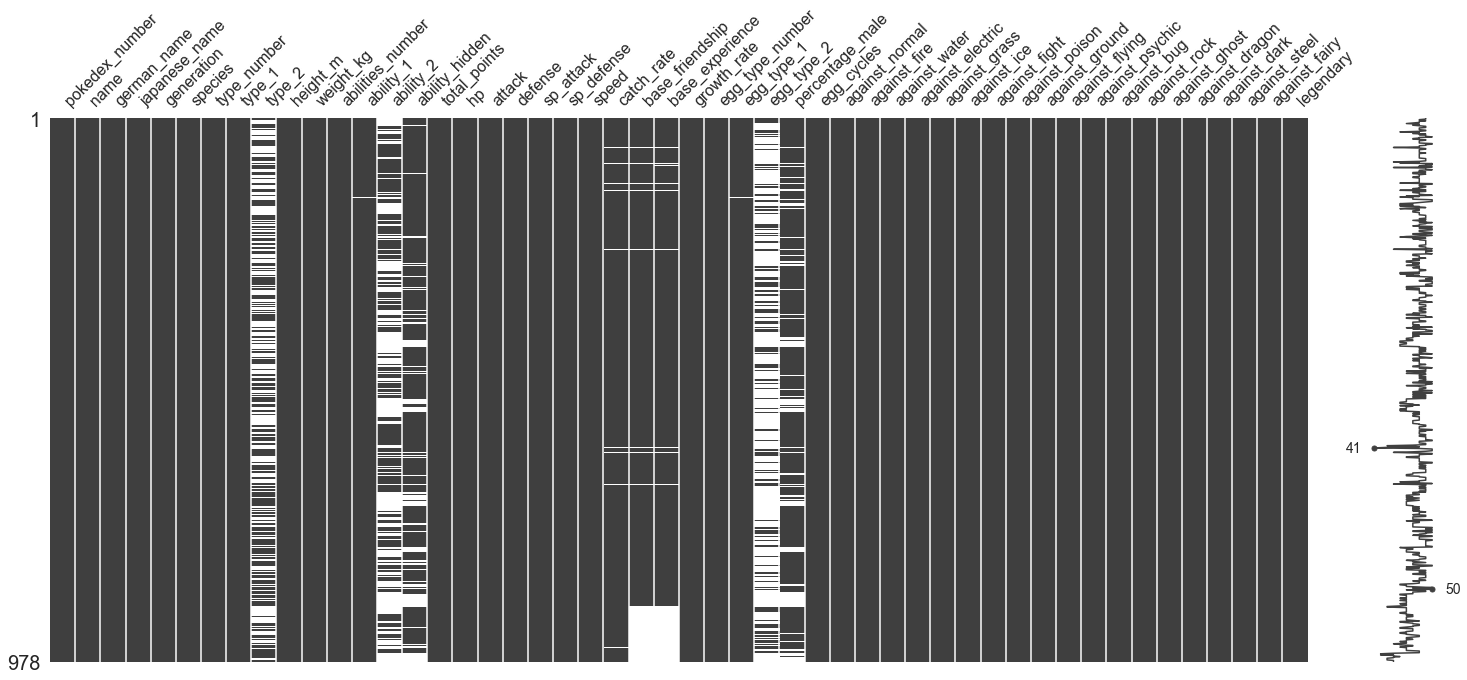

In [ ]:
print(msno.matrix(pokemon))

### 5.6. Toma de decisiones para valores nulos

Debe identificarse la cantidad de valores nulos y si estos corresponden a la ausencia de información o es una caracteristica con la que el pokemon no cuenta y fue registrada como valor nulo o casilla sin valor.

In [ ]:
#### Cantidad total de valores nulos
total_null = pokemon.isnull().sum().sum()
# Cantidad de valores nulos por columna
kkk = pokemon.isnull().sum()
# Se setea como una serie el resultado anterior
mySeries = pd.Series(kkk)
# Lista de variables que contienen valores nulos
zzz = list(pokemon.columns[pokemon.isnull().any()])
# Porcentaje de valores nulos por variable respecto al total
ggg = mySeries.loc[zzz]
ggg = (ggg/pokemon.shape[0]) * 100
# Suma de valores NaN por variable
ccc = mySeries.loc[zzz]
sss = pd.concat([ccc, ggg], axis = 1)
# Renombrar las columnas de la serie
sss.columns = ['Cantidad de NaN', '% NaN respecto al total de la variable']
# Output
print('Existe un total de', total_null, 'valores nulos, que se encuentran en', len(zzz), 'columnas')
print('')
print(sss.sort_values(by='Cantidad de NaN', ascending = False))

Respecto a lo anterior se puede decir que para una importante cantidad de valores en las variables no existe registro, esto cobra mucho sentido al trabajar la misma base de datos con Pokemon que si cuenten con dichas caracteristicas o habilidades, ingresando la información para algunos y no para otros (no se ha escrito "no aplica" por ejemplo), entonces aqui se concluye que no existe registro de que el pokemon presente dicha caracteristica. Se revisara cada columna y se decidira caso por caso.

Respecto a la variable ['Percentage_male'] es notable decir que los valores nulos tienen muchas explicaciones. Un Pokemon legendario por lo general no posee sexo por lo que no hay registro en dicha variable (Valor NaN o nulo). El Pokemon puede existir solo como hembra sin una version macho, tambien existen pokemon que fueron creados artificialmente por lo que carecen de sexo macho o hembra.
<br>
Mas información: https://pokemon.fandom.com/es/wiki/Lista_de_Pok%C3%A9mon_con_g%C3%A9nero_especial

In [ ]:
rslt_df = pokemon.loc[(pokemon['legendary'] == 1)]
rslt_df.loc[:, ['name', 'percentage_male', 'legendary']].head()

,name,percentage_male,legendary
193,Mewtwo,NaN,1
302,Lugia,NaN,1
303,Ho-oh,NaN,1
459,Kyogre,NaN,1
460,Primal Kyogre,NaN,1


Debido a lo explicado antes los Pokemon legendarios no pueden ser encontrados como male (macho) y tampoco como hembra aunque la variable solo hace referencia a encontrarlo como macho, entonces su valor sera cero (no es posible encontrarlo como macho)

Deben ser revisadas y tratadas cada columna de forma individual

*   egg_type_2: Puede no existir un pokemon con segundo tipo de huevo
*   type_2: Puede no existir un pokemon con segundo tipo
*   ability_2: Puede no existir un pokemon con segunda habilidad
*   ability_hidden: Puede no existir un pokemon con habilidad oculta
*   percentage_male: Posible falta de información
*   base_experience: Posible falta de información
*   base_friendship: Posible falta de información
*   catch_rate: Posible falta de información
*   egg_type_1: Puede no existir un pokemon que nazca de huevo
*   ability_1: Puede no existir un pokemon con habilidad
*   growth_rate: Posible falta de información
*   egg_cycles: Posible falta de información

Solución propuesta

*   egg_type_2: Reemplazar por valor no_egg_type_2
*   type_2: Reemplazar por valor no_type_2
*   ability_2: Reemplazar por valor no_ability_2
*   ability_hidden: Reemplazar por valor no_ability_hidden
*   percentage_male: Es probable que exista como hembra o sin genero por lo que se asume un porcentaje de que sea masculino como cero
*   base_experience: Se imputa un valor promedio
*   base_friendship: Se imputa valor promedio
*   catch_rate: Reemplazar por valor cero (no atrapable)
*   egg_type_1: Reemplazar por valor no_type_1
*   ability_1: Reemplazar por valor no_ability_1
*   growth_rate: Se imputa un valor promedio
*   egg_cycles: Se imputa un valor promedio

In [ ]:
pokemon['egg_type_2'].fillna('no_egg_type_2', inplace = True)
pokemon['type_2'].fillna('no_type_2', inplace = True)
pokemon['ability_2'].fillna('no_ability_2', inplace = True)
pokemon['ability_hidden'].fillna('no_ability_hidden', inplace = True)
pokemon['percentage_male'].fillna(0, inplace = True)
pokemon['base_experience'].fillna(pokemon['base_experience'].mean(), inplace = True)
pokemon['base_friendship'].fillna(pokemon['base_friendship'].mean(), inplace = True)
pokemon['catch_rate'].fillna(0, inplace = True)
pokemon['egg_type_1'].fillna('no_type_1', inplace = True)
pokemon['ability_1'].fillna('no_ability_1', inplace = True)
pokemon['growth_rate'].fillna(pokemon['growth_rate'].mode()[0],inplace=True)
pokemon['egg_cycles'].fillna(round(pokemon['egg_cycles'].mean()), inplace = True)

Se revisa nuevamente la cantidad de valores nulos, de existir alguno

In [ ]:
print('Cantidad de valores nulos:',pokemon.isnull().sum().sum())

Cantidad de valores nulos: 0


Se eliminan algunas columnas sin relevancia para el analisis como lo son ['pokedex_number']['name']['german_name']['japanese_name']

In [ ]:
pokemon = pokemon.drop(['pokedex_number', 'german_name', 'japanese_name'], axis=1)

In [ ]:
pokemon.head()

,name,generation,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,...,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,legendary
0,Bulbasaur,1,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0
1,Ivysaur,1,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0
2,Venusaur,1,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0
4,Charmander,1,Lizard Pokémon,1,Fire,no_type_2,0.6,8.5,2,Blaze,...,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0
5,Charmeleon,1,Flame Pokémon,1,Fire,no_type_2,1.1,19.0,2,Blaze,...,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0


### 5.7. Variables numéricas

In [ ]:
# Variables numéricas
# ==============================================================================
pokemon.select_dtypes(include=['float64', 'int']).describe()

,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,sp_attack,...,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,legendary
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,...,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000
mean,4.232106,1.509202,1.230982,67.964213,2.327198,430.733129,69.676892,78.235174,72.962168,71.374233,...,1.175613,0.988753,0.998466,1.244888,1.017382,0.974949,1.076431,0.981851,1.082566,0.038855
std,2.259589,0.500171,1.310672,129.195736,0.770022,115.617063,26.402558,30.783989,29.627154,30.867648,...,0.590375,0.496019,0.610068,0.696331,0.568451,0.364966,0.465520,0.496781,0.530561,0.193348
min,1.000000,1.000000,0.100000,0.100000,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,...,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.500000,8.500000,2.000000,328.000000,50.000000,55.000000,50.000000,49.250000,...,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.000000
50%,4.000000,2.000000,1.000000,28.000000,3.000000,451.000000,65.000000,75.000000,70.000000,65.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6.000000,2.000000,1.500000,66.450000,3.000000,505.000000,82.000000,100.000000,90.000000,91.750000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,8.000000,2.000000,20.000000,999.900000,3.000000,770.000000,255.000000,181.000000,230.000000,180.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,1.000000


Se realizan unas primeras conjeturas sobre la distribución de la data:
El plot de height_m y weight_kg no es el ideal para visualizar diferentes valores
Por ejemplo la columna height_m tiene 57 valores diferentes y la columna weight_kg tiene 450 valores diferentes



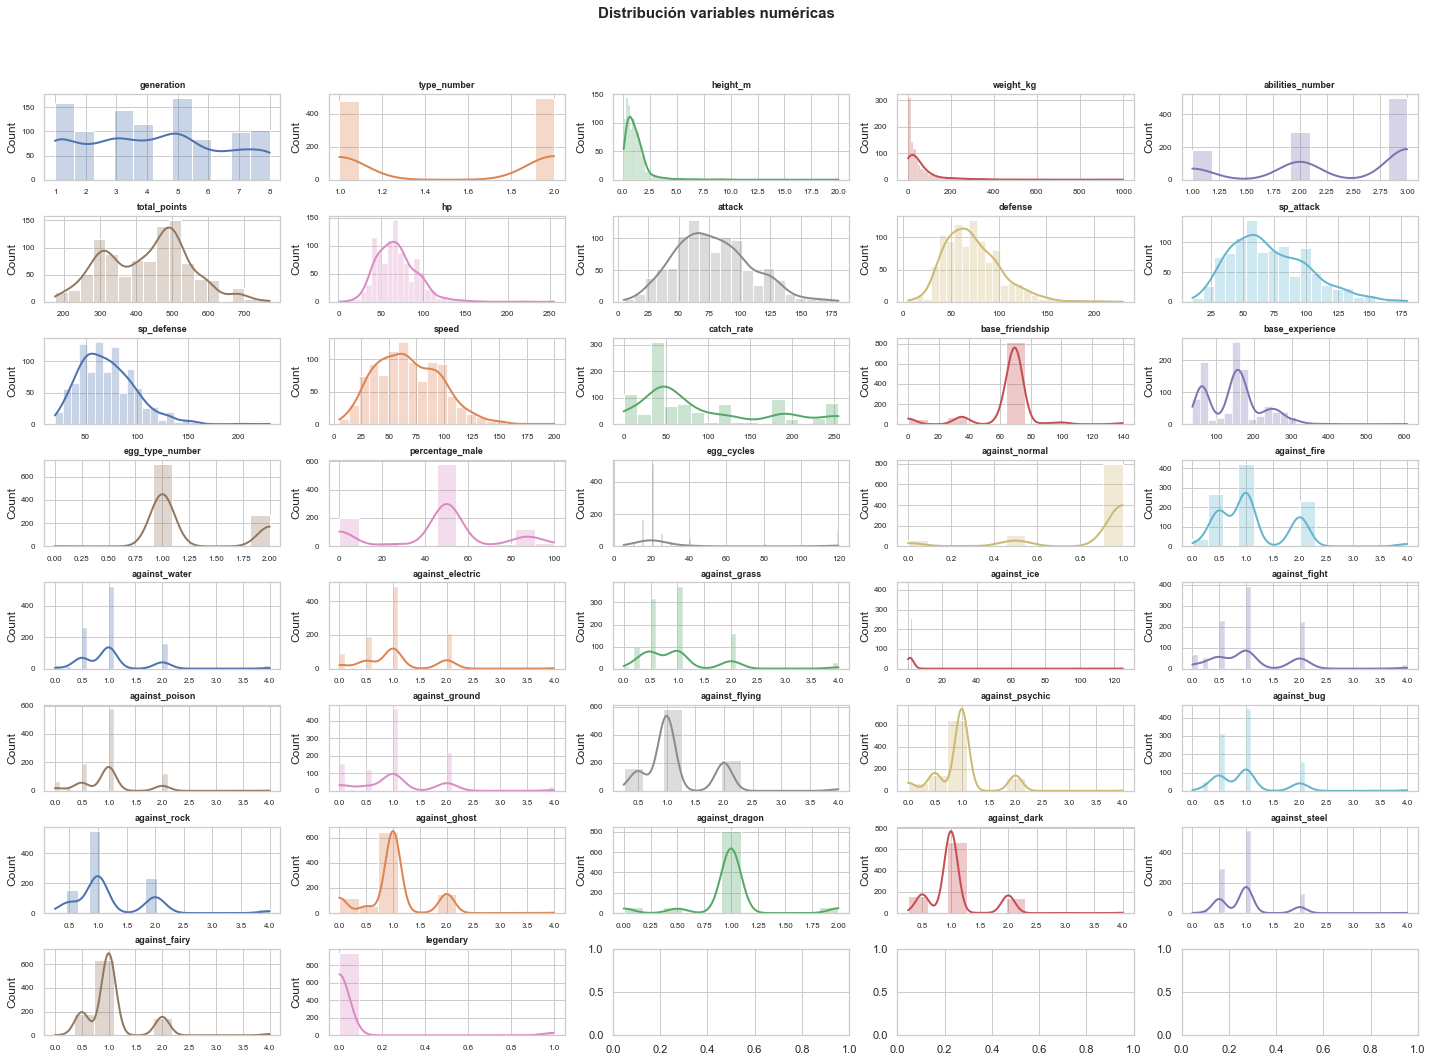

In [ ]:
print('Se realizan unas primeras conjeturas sobre la distribución de la data:')
print('El plot de height_m y weight_kg no es el ideal para visualizar diferentes valores')
print('Por ejemplo la columna height_m tiene', pokemon['height_m'].nunique(), 'valores diferentes y la columna weight_kg tiene', pokemon['weight_kg'].nunique(), 'valores diferentes')
print('')
fig, axes = plt.subplots(nrows = 8, ncols = 5, figsize=(20, 15))
axes = axes.flat
columnas_numeric = pokemon.select_dtypes(include=['float64', 'int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = pokemon,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*4)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 9, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 15, fontweight = "bold");

Para analizar las correlaciones con respecto a una nueva variable no creada (legendario: 1, no legendario: 2) se utilizara la columna total_points como la variable que se considera mas significativa y determinante para decir si un pokemon es legendario o no, bajo la premisa de que los pokemon legendarios son los mas fuertes (estadisticas globales mas altas) y la variable total_points representa esto y a su vez se relaciona fuertemente con el resto de variables estadisticas de pokemon como ataque, def, etc.

In [ ]:
import matplotlib.ticker as ticker

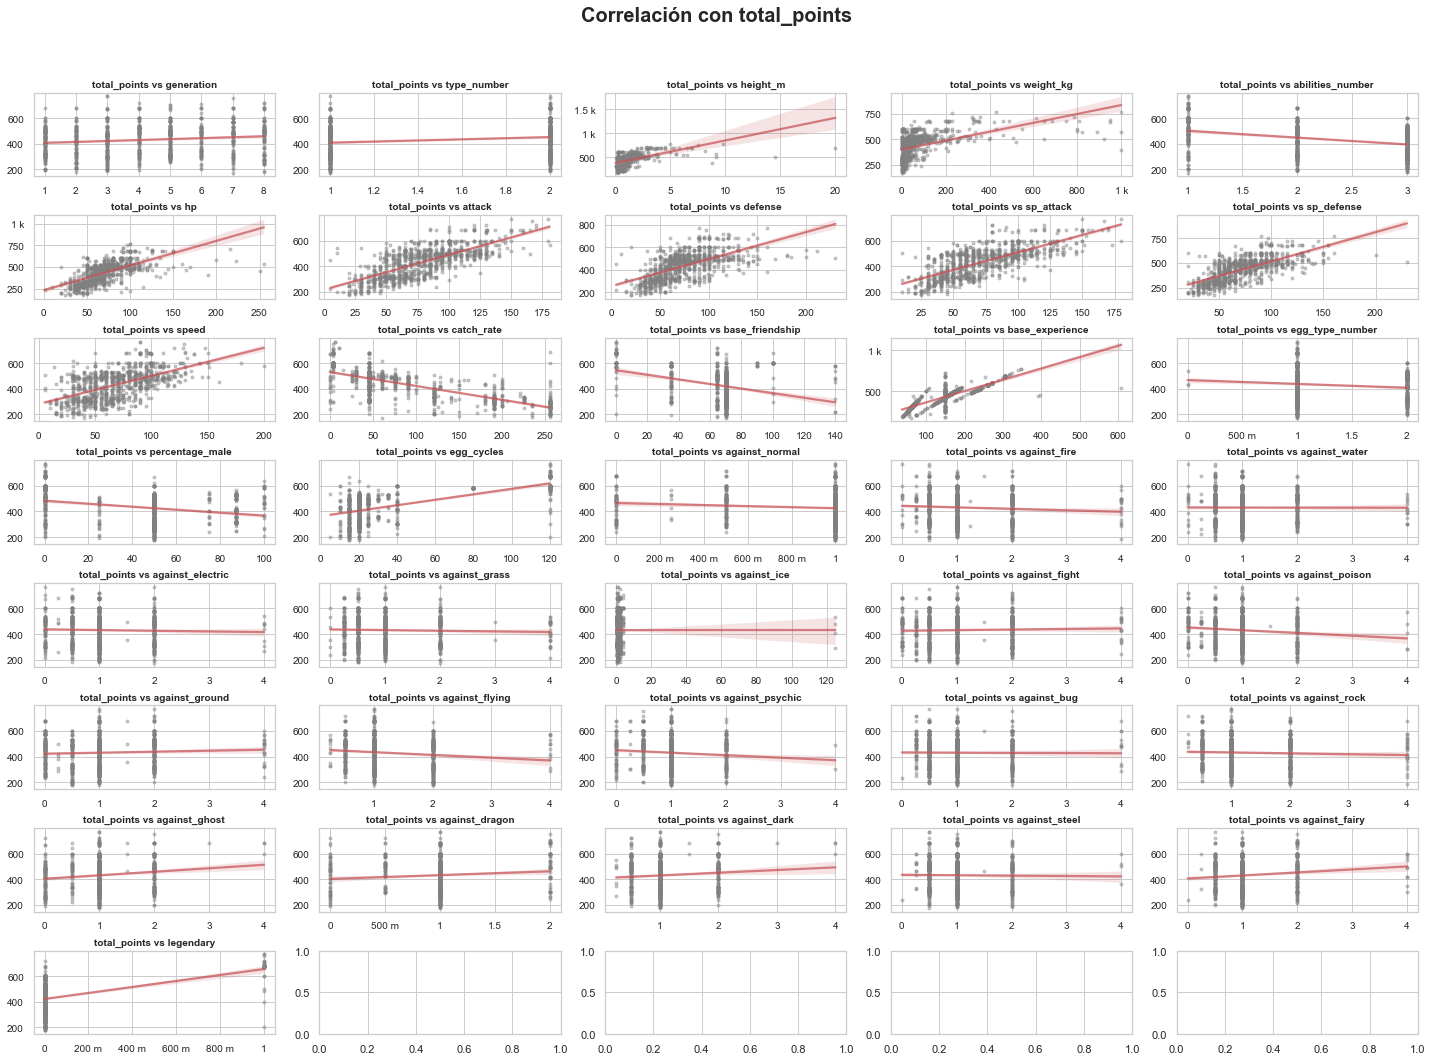

In [ ]:
fig, axes = plt.subplots(nrows = 8, ncols = 5, figsize=(20, 15))
axes = axes.flat
columnas_numeric = pokemon.select_dtypes(include=['float64', 'int64']).columns
columnas_numeric = columnas_numeric.drop('total_points')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = pokemon[colum],
        y           = pokemon['total_points'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"total_points vs {colum}", fontsize = 10, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
#for i in [8]:
#    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con total_points', fontsize = 20, fontweight = "bold");

### 5.8. Correlación de variables numéricas

In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = pokemon.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
199,total_points,base_experience,0.862225,0.862225
523,base_experience,total_points,0.862225,0.862225
194,total_points,sp_attack,0.729158,0.729158
338,sp_attack,total_points,0.729158,0.729158
192,total_points,attack,0.723557,0.723557
264,attack,total_points,0.723557,0.723557
449,catch_rate,total_points,-0.717524,0.717524
197,total_points,catch_rate,-0.717524,0.717524
1180,against_ghost,against_dark,0.709084,0.709084
1252,against_dark,against_ghost,0.709084,0.709084


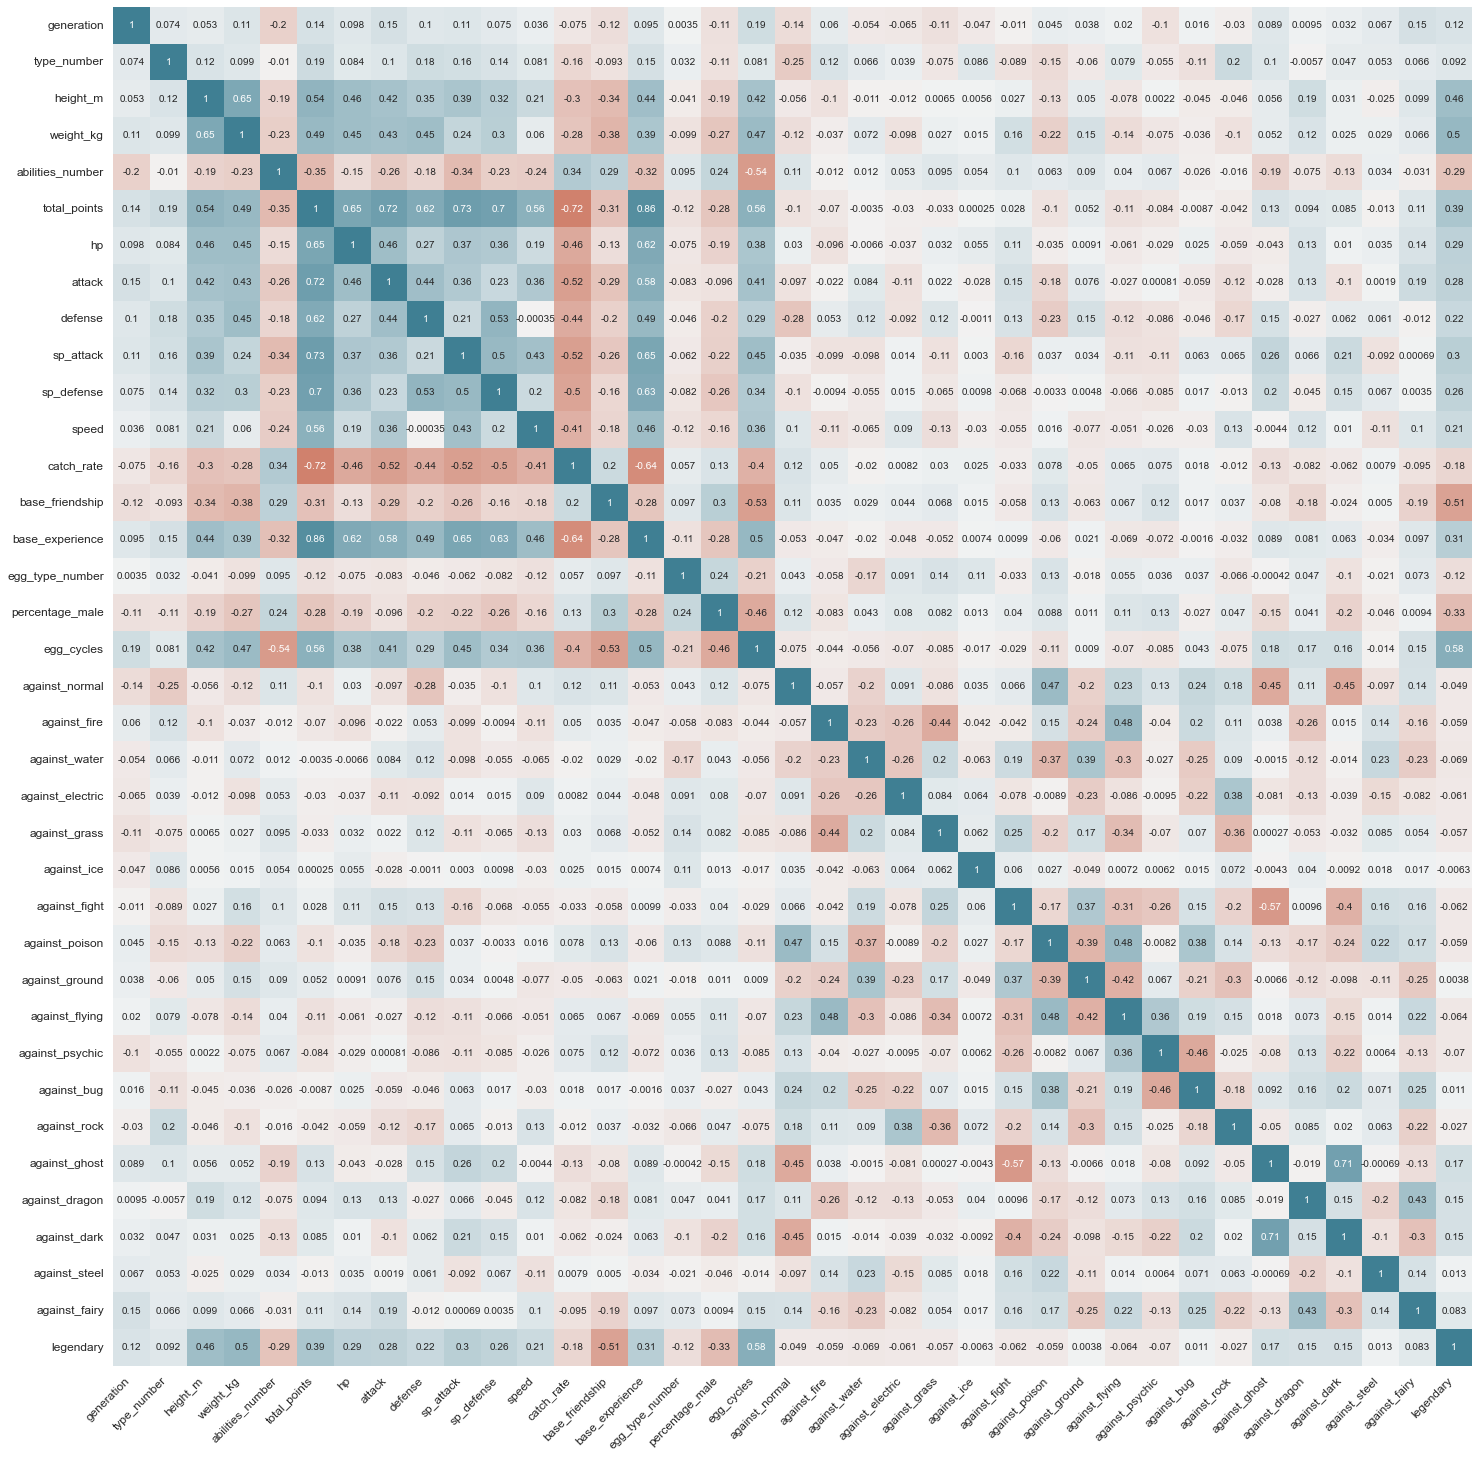

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(35, 25))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 12)

### 5.9. Variables cualitativas

In [ ]:
pokemon.select_dtypes(include=['object']).describe()

,name,species,type_1,type_2,ability_1,ability_2,ability_hidden,growth_rate,egg_type_1,egg_type_2
count,978,978,978,978,978,978,978,978,978,978
unique,978,652,18,19,201,126,153,6,16,12
top,Bulbasaur,Pumpkin Pokémon,Water,no_type_2,Levitate,no_ability_2,no_ability_hidden,Medium Fast,Field,no_egg_type_2
freq,1,8,129,480,39,474,182,413,240,710


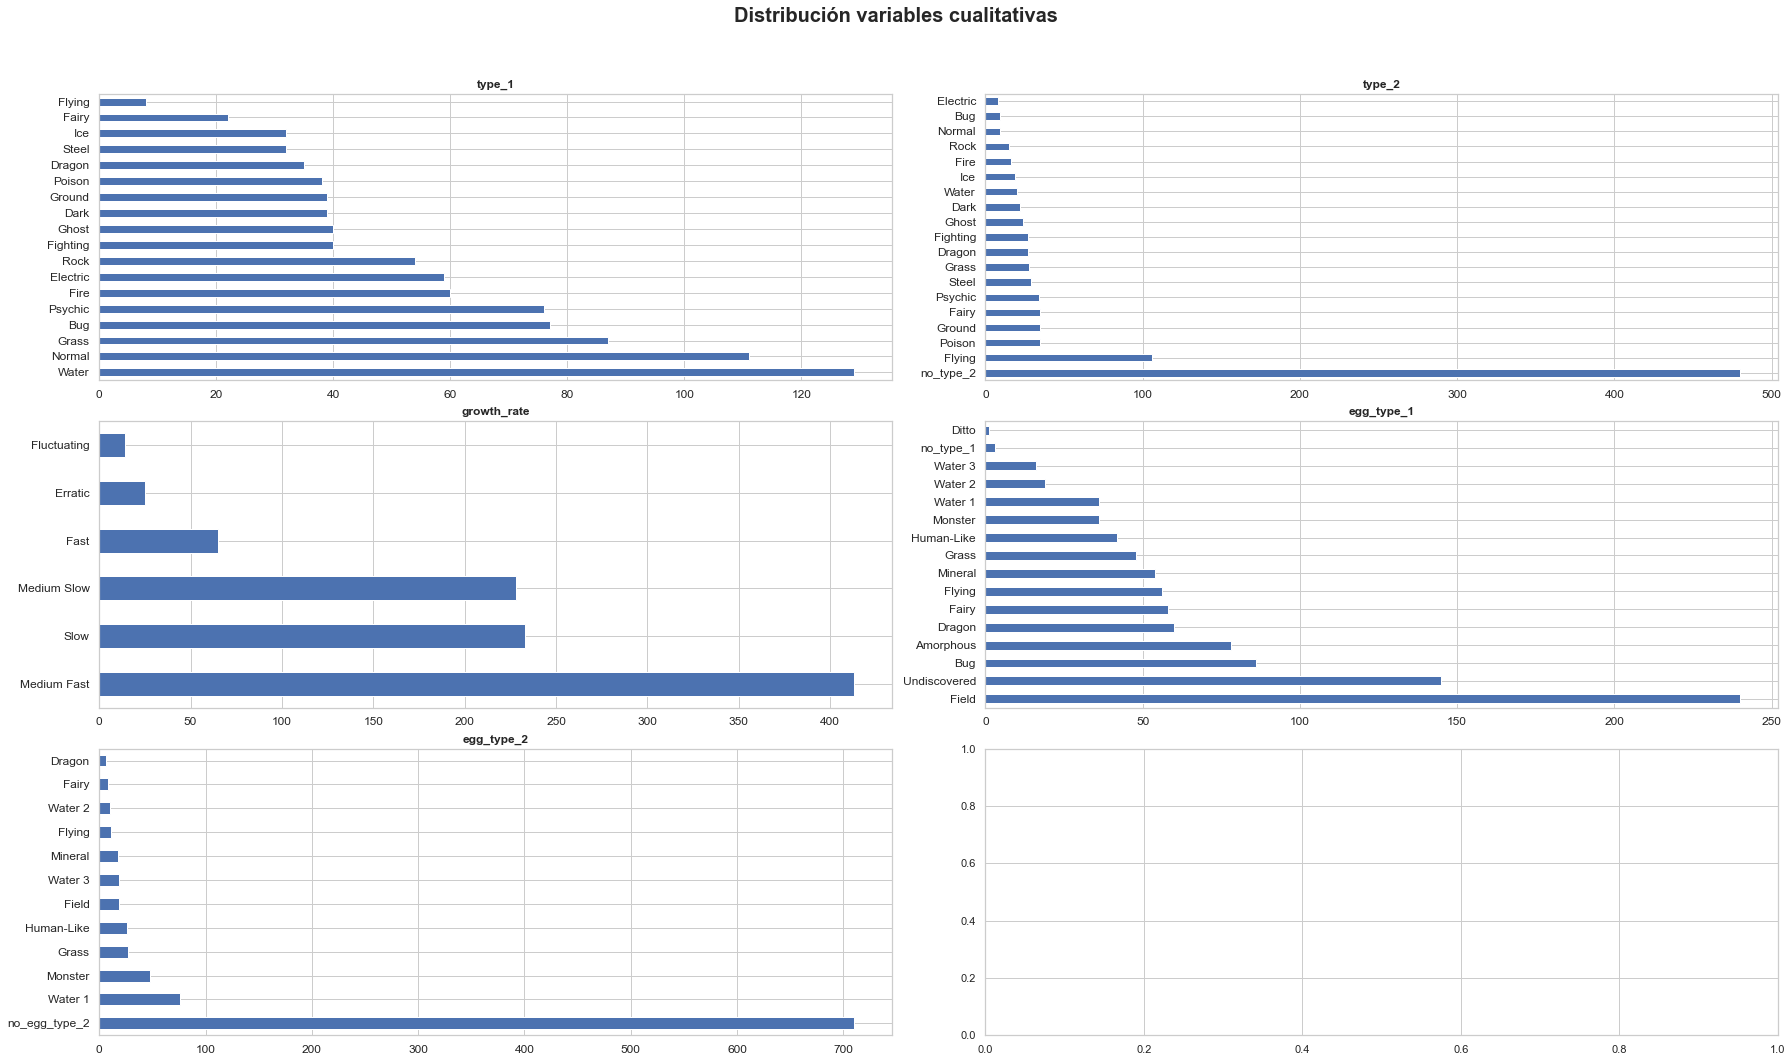

In [ ]:
# Gráfico para cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 15))
axes = axes.flat
columnas_object = pokemon.loc[:, ['type_1', 'type_2', 'growth_rate', 'egg_type_1', 'egg_type_2']].columns
for i, colum in enumerate(columnas_object):
    pokemon[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 12)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
# for i in [7, 8]:
#    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 20, fontweight = "bold");

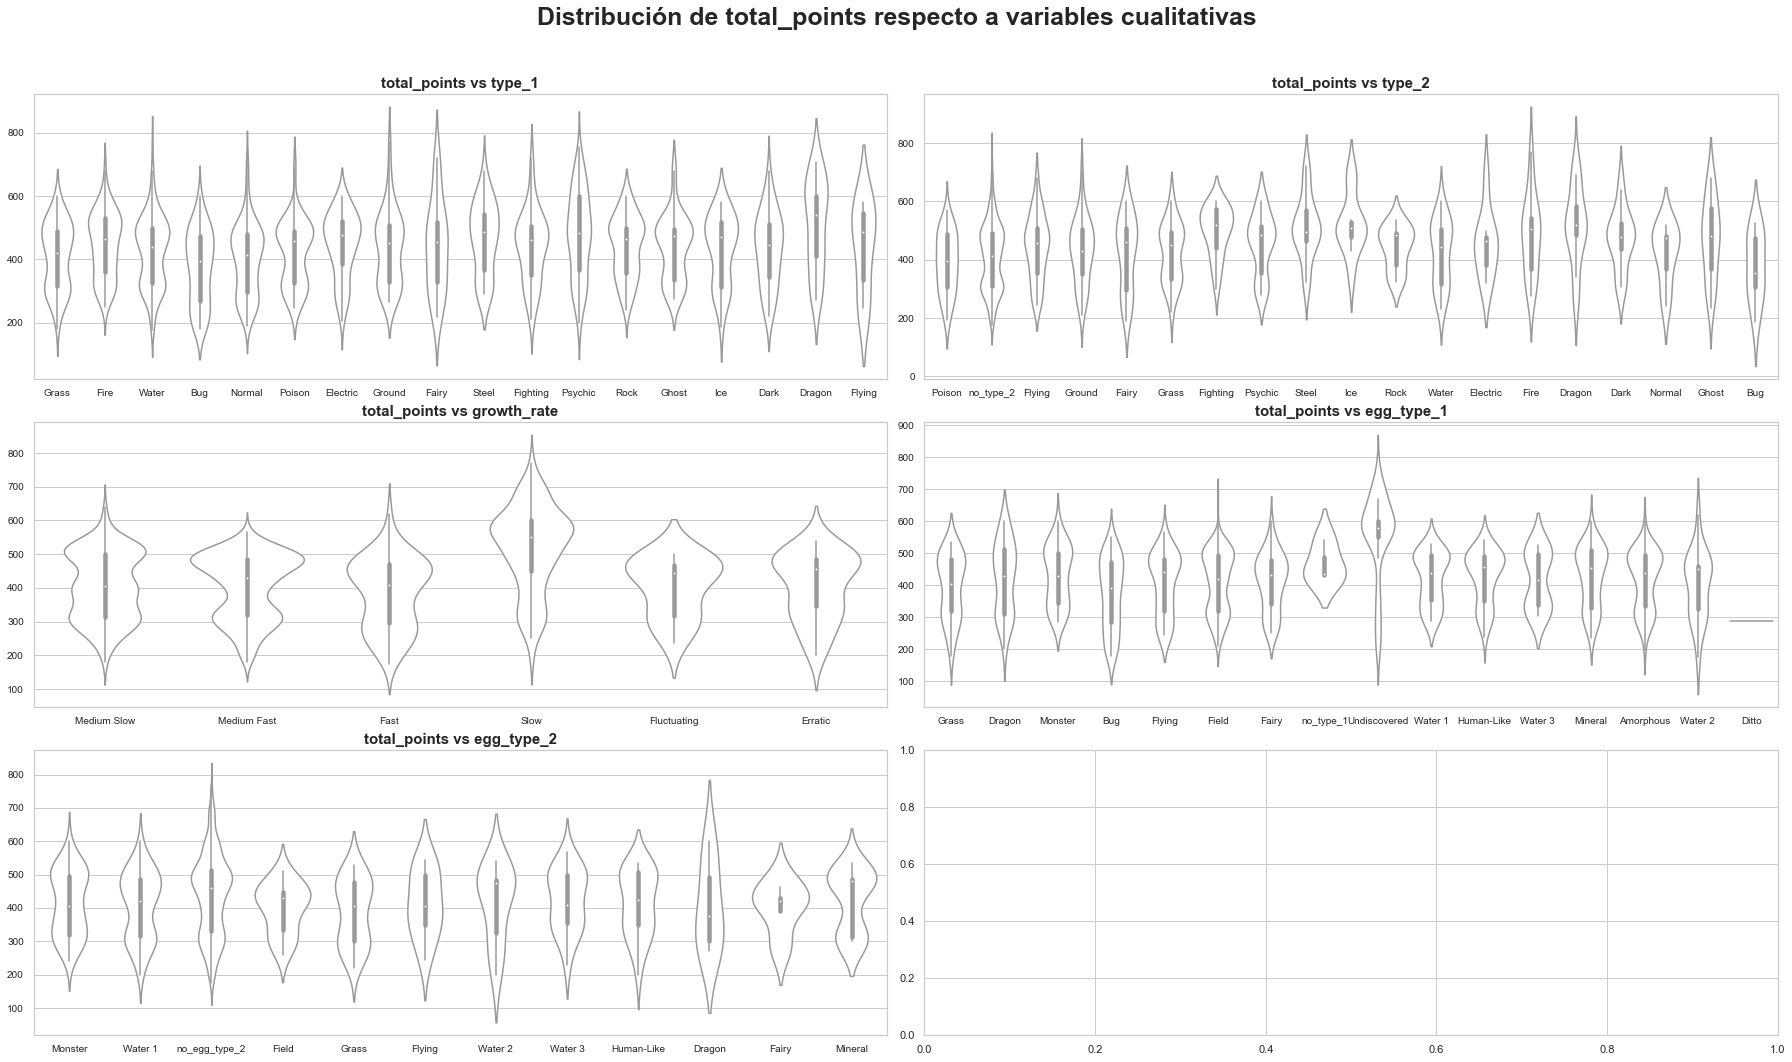

In [ ]:
# Gráfico relación entre el total_points y cada cada variables cualitativas
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(25, 15))
axes = axes.flat
columnas_object = pokemon.loc[:, ['type_1', 'type_2', 'growth_rate', 'egg_type_1', 'egg_type_2']].columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'total_points',
        data  = pokemon,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"total_points vs {colum}", fontsize = 15, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
# for i in [7, 8]:
#    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de total_points respecto a variables cualitativas', fontsize = 25, fontweight = "bold");

Es notable ver el comportamiento de total_points respecto a growth_rate, los Pokemon legendarios tienen baja tasa de crecimiento (Slow growth rate), asi tambien, total_points respecto a egg_type_1, los Pokemon legendarios por lo general estan asociados a un egg_type_1 'undiscovered'.
<br>
Para mas información sobre tasas de crecimiento: https://pokemondb.net/pokebase/95996/why-do-all-legendary-pokemon-have-a-slow-growth-rate
<br>
Para mas información sobre tipo de huevo: https://www.ign.com/wikis/pokemon-x-y/Undiscovered_Egg_Group

### 5.10. Identificación de valores duplicados

Como se esperaba, la columna Generation y Legendary poseen valores repetidos lo cual tiene mucho sentido, hay muchos Pokemon por generacion y muchos no legendarios y si legendarios. La columna name posee valores unicos lo cual es bueno y podria permitir utilizar la columna con Index. La limpieza de variantes Pokemon (Alola, Gigamax, Megamax) no despejo todos los valores duplicados en la columna pokedex_number (recordar que estas variantes utilizaban el mismo pokedex_number).

In [ ]:
print('Datos duplicados en la columna Generation:',pokemon_dup_check.duplicated(subset=['generation']).sum())
print('Datos duplicados en la columna legendary:',pokemon.duplicated(subset=['legendary']).sum())
print('Datos duplicados en la columna name:',pokemon_dup_check.duplicated(subset=['name']).sum())
print('Datos duplicados en la columna total_points:',pokemon_dup_check.duplicated(subset=['total_points']).sum())

Datos duplicados en la columna Generation: 1037
Datos duplicados en la columna legendary: 976
Datos duplicados en la columna name: 0
Datos duplicados en la columna total_points: 829


In [ ]:
pokemon.set_index('name', inplace = True);

Lo anterior corresponde a valores duplicados pero justificados, existen varios pokemon que pertenecen a las distintas generaciones, existen muchos no legendarios bajo la condicion legendario:1 no legendario:0 y pueden darse el caso de que los valores de total_points esten duplicados.

Se realiza una revision "manual" exportando el dataframe actual para identificar el problema con pokedex_number

In [ ]:
#from google.colab import drive
#drive.mount('drive')

In [ ]:
#pokemon.to_csv('data.csv')
#!cp data.csv "drive/My Drive/"

A manera de ejemplo se encuentra el siguiente Pokemon llamado Castform que presenta variaciones en su tipo debido al clima y comparten el mismo pokedex_number. Debido a lo anterior, esta columna no puede ser utilizada como index

In [ ]:
pokemon_dup_check.loc[[418, 419, 420, 421], 'pokedex_number':'name']

,pokedex_number,name
418,351,Castform
419,351,Castform Sunny Form
420,351,Castform Rainy Form
421,351,Castform Snowy Form


No han sido identificados problemas respecto a valores repetidos

### 5.11. Distribución de total_points

Relaciones categoricas de total_points con generation

In [ ]:
var = 'generation'
data = pd.concat([pokemon['total_points'], pokemon[var]], axis = 1)

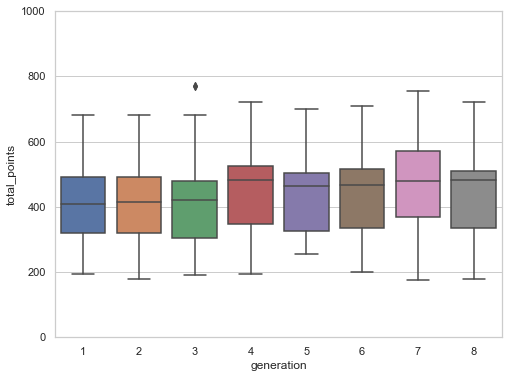

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = var, y = 'total_points', data = data)
fig.axis(ymin = 0, ymax = 1000)
plt.show()

Como se puede visualizar en cada generacion se ha tratado de mantener un balance de puntos totales con un rango de valores (tamaño de caja) muy similar y una media mas elevada 

En la grafica de cajas se identifica un outlier que no es identificado por el metodo siguiente para la deteccion de outliers por lo que este valor sera omitido al no considerarse perjudicial para el analisis. Es posible que mas que un outlier, este corresponda a un valor real para un Pokemon increiblemente fuerte de la tercera generación.

In [ ]:
arr1 = pokemon['total_points']
# Encontrando el primer cuartil
q1 = np.quantile(arr1, 0.25)
 
# Encontrando el valor cuartil
q3 = np.quantile(arr1, 0.75)
med = np.median(arr1)
 
# Encontrando la region iqr
iqr = q3-q1
 
# Encontrando los limites inferior y superior
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

# print(iqr, upper_bound, lower_bound)
outliers = arr1[(arr1 <= lower_bound) | (arr1 >= upper_bound)]
print('Los siguientes valores son outliers:{} '.format(outliers))

Los siguientes valores son outliers:Series([], Name: total_points, dtype: int64) 


Ese "outlier" que se puede ver en generation 3 es necesario revisarlo 

Se filtra el dataframe original por total_points para encontrar a los Pokemon mas fuertes

In [ ]:
pokemon_save.loc[pokemon_save.total_points > 700, :][:5].sort_values(by = 'total_points', ascending = False)

,pokedex_number,name,german_name,japanese_name,generation,species,type_number,type_1,type_2,height_m,...,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,legendary
460,382,Primal Kyogre,Kyogre,カイオーガ (Kyogre),3,Sea Basin Pokémon,1,Water,no_type_2,9.8,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1
462,383,Primal Groudon,Groudon,グラードン (Groudon),3,Continent Pokémon,2,Ground,Fire,5.0,...,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,1
936,800,Ultra Necrozma,Necrozma,ネクロズマ (Necrozma),7,Prism Pokémon,2,Psychic,Dragon,7.5,...,1.0,0.5,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1
590,493,Arceus,Arceus,アルセウス (Arceus),4,Alpha Pokémon,1,Normal,no_type_2,3.2,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0
841,718,Zygarde Complete Forme,Zygarde,ジガルデ (Zygarde),6,Order Pokémon,2,Dragon,Ground,4.5,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,1.0,2.0,1


Los Pokemon mas fuertes se encuentran en la tercera generación (sin contar Pokemon con variantes Mega y Dinamax), ahora un filtrado solo a dicha generación

In [ ]:
pokemon_save[['name','generation','total_points']].loc[pokemon_save['generation'] == 3].sort_values(by = 'total_points', ascending = False).head()

,name,generation,total_points
460,Primal Kyogre,3,770
462,Primal Groudon,3,770
463,Rayquaza,3,680
348,Slaking,3,670
459,Kyogre,3,670


Los valores fuera de rango corresponden a las versiones primal de pokemon de la tercera generación siendo esta la explicación de su elevado total_points. Notese a Slaking (pokemon de tipo normal) que compite en estadisticas con Pokemon legendarios.

Para mas información: https://www.thegamer.com/pokemon-gen-3-strongest-stats/

### 5.12. Análisis de total_points

De primera revisamos un plot scatter contraponiendo las variables que creemos tienen mayor impacto en total_points que son 'attack' y 'sp_attack'. Ambas resultan tener una buena correlacion

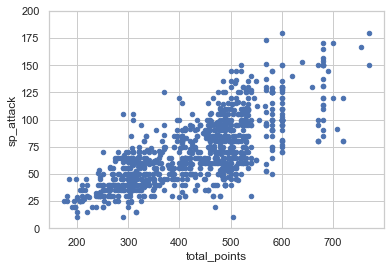

In [ ]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

data_scatter_1 = pd.concat([pokemon['total_points'], pokemon['sp_attack']], axis = 1)
data_scatter_1.plot.scatter(x = 'total_points', y = 'sp_attack', ylim = (0,200))
plt.plot();

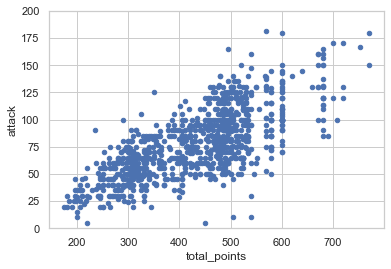

In [ ]:
data_scatter_2 = pd.concat([pokemon['total_points'], pokemon['attack']], axis = 1)
data_scatter_2.plot.scatter(x = 'total_points', y = 'attack', ylim = (0,200))
plt.plot();

In [ ]:
pokemon['total_points'].describe()

count    978.000000
mean     430.733129
std      115.617063
min      175.000000
25%      328.000000
50%      451.000000
75%      505.000000
max      770.000000
Name: total_points, dtype: float64

In [ ]:
from scipy.stats import kurtosis, skew

Skew cercano a cero sugiere que la distribucion de la masa esta concentrada en el centro

mean :  430.73312883435585
var  :  13353.637368738016
skew :  0.04897893387487208
kurt :  -0.5238949905119856


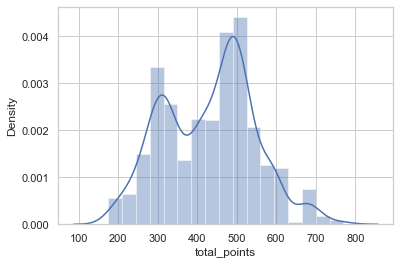

In [ ]:
import matplotlib.pyplot as plt

data = pokemon['total_points']
np.var(data)
sns.distplot(pokemon['total_points'])

print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ",skew(data))
print("kurt : ",kurtosis(data))

### 5.13. Label Encoding

In [ ]:
pokemon.select_dtypes(include = 'object').columns

Index(['species', 'type_1', 'type_2', 'ability_1', 'ability_2',
       'ability_hidden', 'growth_rate', 'egg_type_1', 'egg_type_2'],
      dtype='object')

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
pokemon['species'] = le.fit_transform(pokemon['species'])
pokemon['type_1'] = le.fit_transform(pokemon['type_1'])
pokemon['type_2'] = le.fit_transform(pokemon['type_2'])
pokemon['ability_1'] = le.fit_transform(pokemon['ability_1'])
pokemon['ability_2'] = le.fit_transform(pokemon['ability_2'])
pokemon['ability_hidden'] = le.fit_transform(pokemon['ability_hidden'])
pokemon['growth_rate'] = le.fit_transform(pokemon['growth_rate'])
pokemon['egg_type_1'] = le.fit_transform(pokemon['egg_type_1'])
pokemon['egg_type_2'] = le.fit_transform(pokemon['egg_type_2'])

In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, Bulbasaur to Calyrex Shadow Rider
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   generation        978 non-null    int64  
 1   species           978 non-null    int64  
 2   type_number       978 non-null    int64  
 3   type_1            978 non-null    int64  
 4   type_2            978 non-null    int64  
 5   height_m          978 non-null    float64
 6   weight_kg         978 non-null    float64
 7   abilities_number  978 non-null    int64  
 8   ability_1         978 non-null    int64  
 9   ability_2         978 non-null    int64  
 10  ability_hidden    978 non-null    int64  
 11  total_points      978 non-null    int64  
 12  hp                978 non-null    int64  
 13  attack            978 non-null    int64  
 14  defense           978 non-null    int64  
 15  sp_attack         978 non-null    int64  
 16  sp_defense        978 no

### 5.14. Correlación de variables

#### 5.14.1. Matriz de correlación


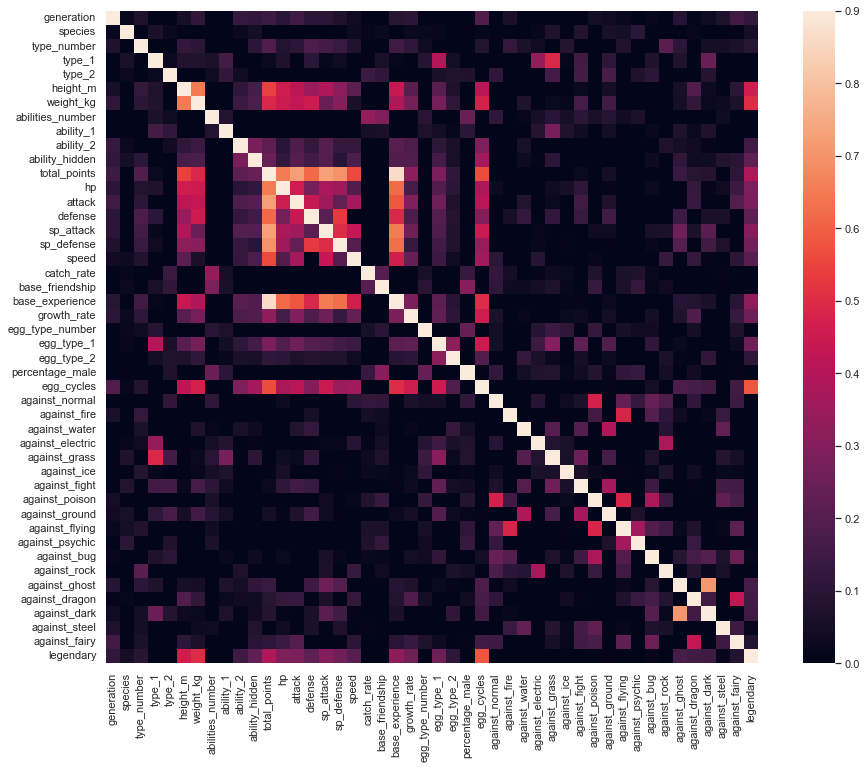

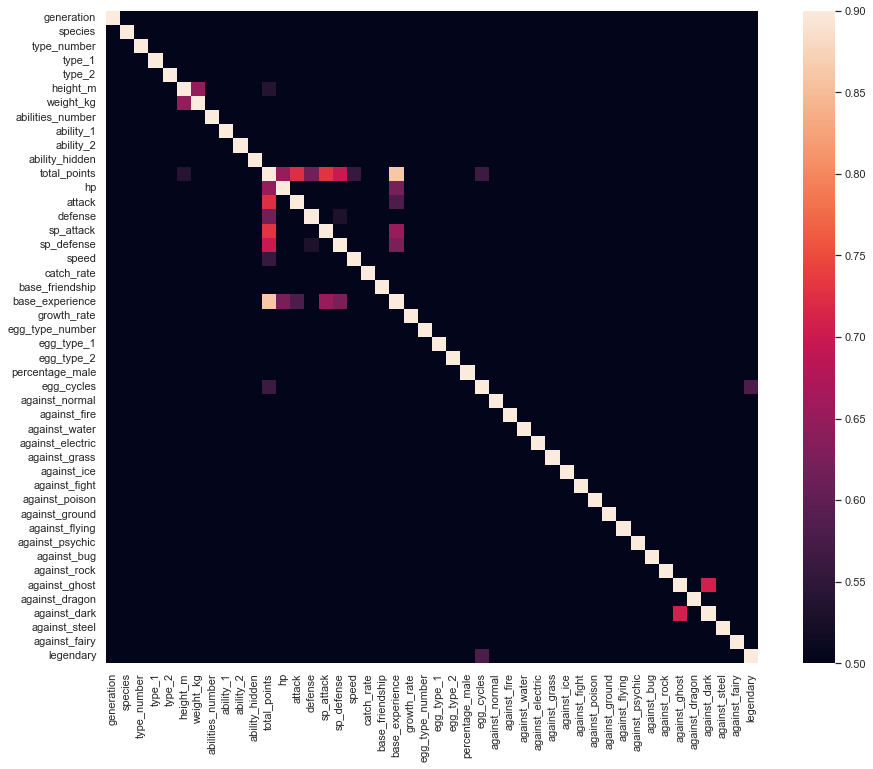

In [ ]:
corrmat = pokemon.corr()
f, ax = plt.subplots(figsize = (16,12))
sns.heatmap(corrmat, vmin = 0, vmax = 0.9, square = True)
plt.show()
f, ax = plt.subplots(figsize = (16,12))
sns.heatmap(corrmat, vmin = 0.5, vmax = 0.9, square = True)
plt.show()

La columna total_points es la que mas guarda correlaciones altas con otras variables. Tambien se puede ver una alta correlacion pero muy especifica entre against_dark y against_ghost

las variables mas relacionadas son:

In [ ]:
k = 12
cols = corrmat.nlargest(k, 'total_points')['total_points'].index
print(cols.values)

['total_points' 'base_experience' 'sp_attack' 'attack' 'sp_defense' 'hp'
 'defense' 'egg_cycles' 'speed' 'height_m' 'weight_kg' 'legendary']


<function matplotlib.pyplot.show(close=None, block=None)>

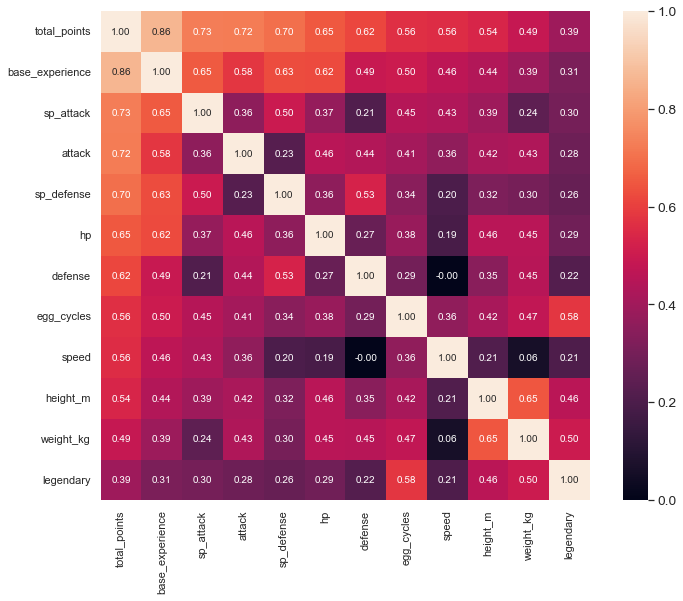

In [ ]:
f, ax = plt.subplots(figsize = (12,9))
cm = np.corrcoef(pokemon[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = ".2f", annot_kws = {"size":10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show

### 5.15. Pairplot entre las variables de mayor correlación

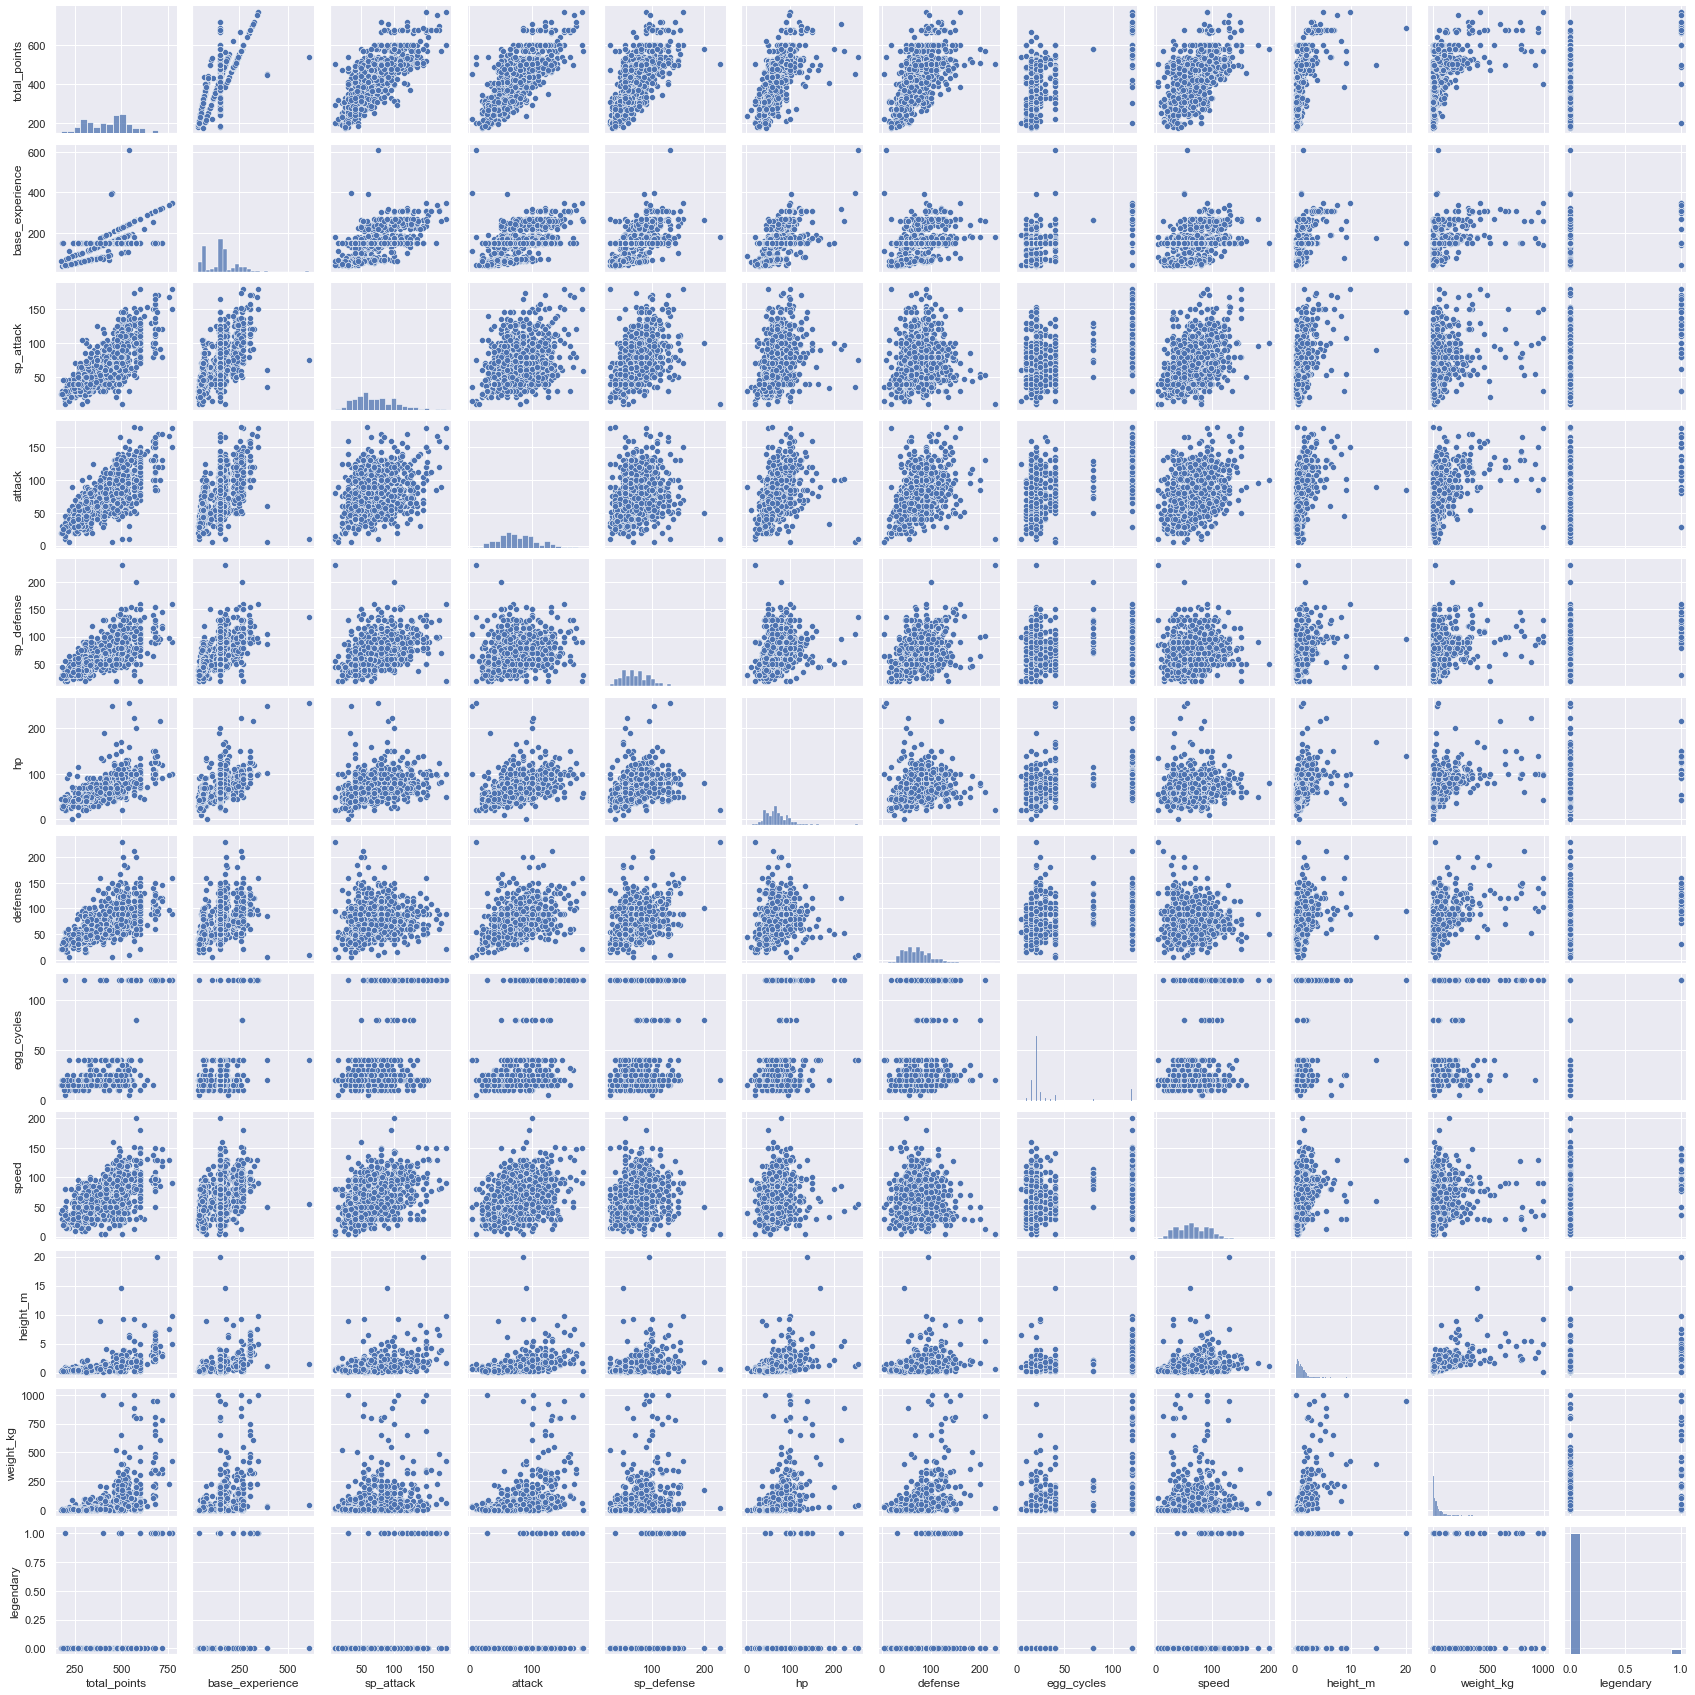

In [ ]:
sns.set()
colss = cols.values
sns.pairplot(pokemon[colss], height = 2)
plt.show()

### 5.16. Histogramas

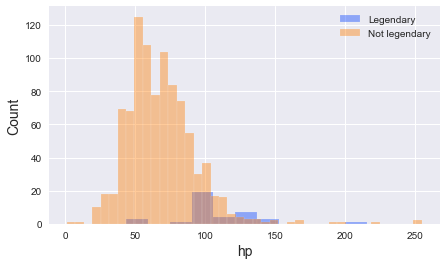

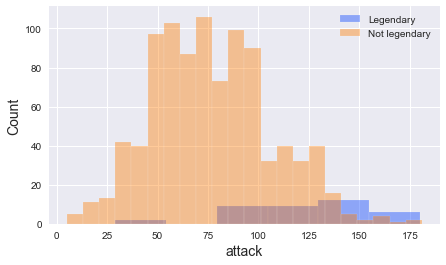

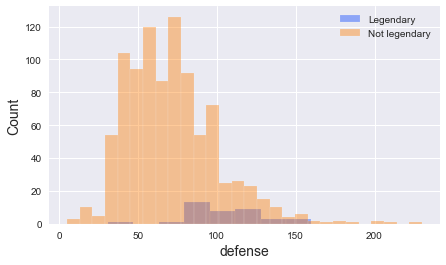

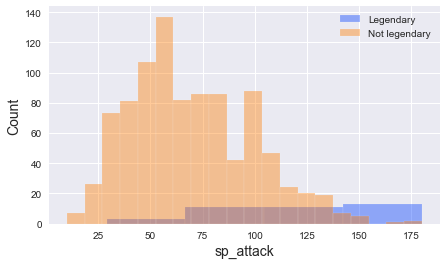

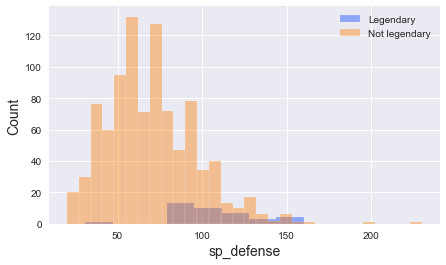

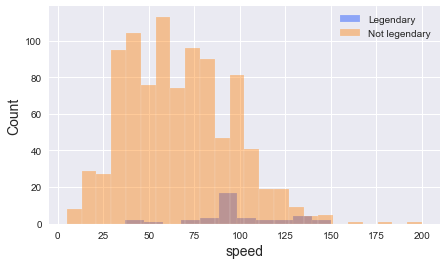

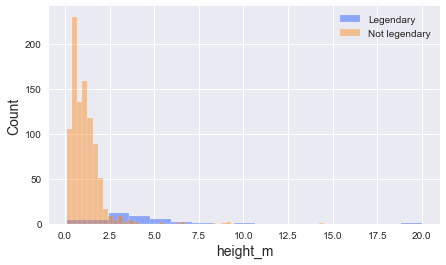

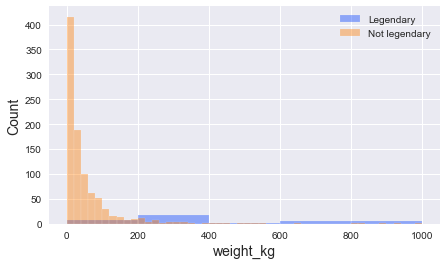

In [ ]:
# Se crean los histogramas de cada estadistica para pokemon legendario y no legendario y ambas se sobreponen 

def multi_hist_plot(df_1, df_2, to_plot):
    
    fig = plt.figure(figsize=(7,4))
    plt.style.use('seaborn')
    sns.set_palette('bright')
    
    hist_1 = sns.distplot(df_1[to_plot], kde = False, label = 'Legendary')
    hist_2 = sns.distplot(df_2[to_plot], kde = False, label = 'Not legendary')
    
    plt.xlabel(to_plot, size=14)
    plt.ylabel("Count", size=14)

    plt.legend()
    plt.show()

df_1 = pokemon[pokemon['legendary'] == 1]
df_2 = pokemon[pokemon['legendary'] == 0]

hp_hist = multi_hist_plot(df_1, df_2, 'hp')
attack_hist = multi_hist_plot(df_1, df_2, 'attack')
defense_hist = multi_hist_plot(df_1, df_2, 'defense')
spattack_hist = multi_hist_plot(df_1, df_2, 'sp_attack')
spdefense_hist = multi_hist_plot(df_1, df_2, 'sp_defense')
speed_hist = multi_hist_plot(df_1, df_2, 'speed')
height_hist = multi_hist_plot(df_1, df_2, 'height_m')
weight_hist = multi_hist_plot(df_1, df_2, 'weight_kg');

Se puede evidenciar que los pokemon legendarios presentan en las variables weight_kg, height_m y sp_attack estadisticas muy superiores.

## 6. El dataset

### 6.1. Limpieza del dataset

Para una clasificación de Pokemon legendarios 'total_points' es la variable elegida como primaria teniendo gran influencia en el hecho de que un pokemon sea legendario o no. Variables 'weight_kg' y 'height_m' tienen alta correlación con la variable 'legendary' pero mala correlación con el resto de variables, es entonces que de las 3 variables se elige 'legendary' que posee buena correlación con 'legendary' y buena relación con el resto de las variables. Seran introducidos al dataset final las columnas de mayor correlación con 'total_points'.

Recordar que name no podia ser index debido a que existen variables de Pokemon como la anteriormente presentada de Castform.

El dataset final es como sigue:

In [ ]:
pokemaster = pokemon[cols.values]
pokemaster

,total_points,base_experience,sp_attack,attack,sp_defense,hp,defense,egg_cycles,speed,height_m,weight_kg,legendary
name,,,,,,,,,,,,
Bulbasaur,318,64.000000,65,49,65,45,49,20.0,45,0.7,6.9,0
Ivysaur,405,142.000000,80,62,80,60,63,20.0,60,1.0,13.0,0
Venusaur,525,236.000000,100,82,100,80,83,20.0,80,2.0,100.0,0
Charmander,309,62.000000,60,52,50,39,43,20.0,65,0.6,8.5,0
Charmeleon,405,142.000000,80,64,65,58,58,20.0,80,1.1,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Glastrier,580,148.605355,65,145,110,100,130,120.0,30,2.2,800.0,0
Spectrier,580,148.605355,145,65,80,100,60,120.0,130,2.0,44.5,0
Calyrex,500,148.605355,80,80,80,100,80,120.0,80,1.1,7.7,1


### 6.2. Ajustes a la data para construir modelos de clasificación

Es importante notar que existen 38 Pokemon legendarios (value = 1) y 940 Pokemon no legendarios lo cual es un claro desbalance de la data

Data muy desbalanceada
<br>
0 --> Normal Pokemon
<br>
1  --> Legendary Pokemon

0    940
1     38
Name: legendary, dtype: int64


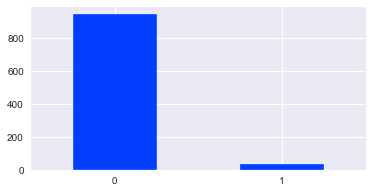

In [ ]:
print(pokemon['legendary'].value_counts());
fig = plt.figure(figsize=(6,3))
pokemon['legendary'].value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.show()

La media de estadisticas individuales y global (total_points) son claramente mas altas para los pokemon legendarios

In [ ]:
pokemaster.groupby('legendary').mean()

,total_points,base_experience,sp_attack,attack,sp_defense,hp,defense,egg_cycles,speed,height_m,weight_kg
legendary,,,,,,,,,,,
0,421.658511,144.073611,69.519149,76.505319,69.508511,68.159574,71.645745,27.991489,66.320213,1.110319,54.955213
1,655.210526,260.706391,117.263158,121.026316,106.684211,107.210526,105.526316,120.000000,97.500000,4.215789,389.765789


Extraemos la columna target del dataframe final como variable independiente y removemos la misma del dataframe final

In [ ]:
x = pokemaster.drop(columns = 'legendary', axis = 1)
y = pokemaster['legendary']

Almacenamos el nombre de las futuras columnas de la data de entrenamiento

In [ ]:
x_columns = x.columns

### 6.3. Estandarización de la data

Para un mejor funcionamiento de los modelos es necesario estandarizar la data que actualmente se encuentra con rangos de valores muy variados, algunos entre 0-1 y otros entre 0 y 1000.

Creación del modelo para estandarizar valores y ajuste a la data de entrenamiento

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(x);

Una vez ajustada al modelo se procede a realizar la transformación y se comprueba la misma

In [ ]:
x_standardized = scaler.transform(x)

In [ ]:
print(x_standardized)

[[-0.97555503 -1.17659925 -0.20660772 ... -0.76822426 -0.4053288
  -0.47289065]
 [-0.22268594 -0.09186009  0.27958658 ... -0.25679524 -0.17632154
  -0.42565131]
 [ 0.81575417  1.21538966  0.92784565 ...  0.42511012  0.587036
   0.24809006]
 ...
 [ 0.59941248  0.          0.27958658 ...  0.42511012 -0.09998579
  -0.46669533]
 [ 2.15707265  0.          0.44165135 ... -0.59774792  0.89237901
   5.73946948]
 [ 2.15707265  0.          3.03468762 ...  2.81177887  0.89237901
  -0.11123867]]


In [ ]:
x = x_standardized

### 6.4. Tratamiento de desbalance en la data

Al ser los pokemon legendarios una minoria en el dataset hay que sintetizar nueva data sobre la data de entrenamiento para compensar ese desbalance y se hara mediante el algoritmo SMOTE

0 --> Normal Pokemon
1 --> Legendary Pokemon

0    940
1    940
Name: legendary, dtype: int64



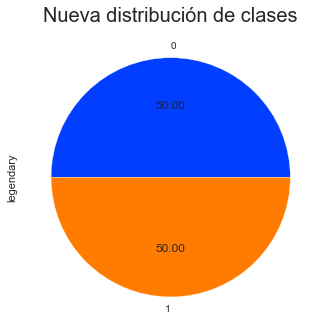

In [ ]:
smote = SMOTE(sampling_strategy = 'minority')
x_smote, y_smote = smote.fit_resample(x, y)

# Plot de los cambios realizados
print('0 --> Normal Pokemon')
print('1 --> Legendary Pokemon')
print('')
print(y_smote.value_counts())
print('')
ax = y_smote.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Nueva distribución de clases", fontsize = 20)

Para compensar el desbalance se realizó el rebalance de clases

In [ ]:
print('Desde: x con forma', x.shape, ', y con forma', y.shape)

Desde: x con forma (978, 11) , y con forma (978,)


In [ ]:
print('A: x_smote con forma', x_smote.shape, ', y_smote con forma', y_smote.shape)

A: x_smote con forma (1880, 11) , y_smote con forma (1880,)


Para continuar trabajando las variables con las etiquetas clásicas se vuelven a reasignar las mismas

In [ ]:
x = x_smote
y = y_smote

###  6.5. Asignación de la data de entrenamiento y test

Con la nueva data estandarizada se procede a dividir la data en una parte para entrenar y otra para realizar validaciones

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, stratify = y, random_state = 42)

Comprobamos el tamaño y forma de los splits realizados

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1316, 11) (1316,) (564, 11) (564,)


Comprobamos el tamaño y forma de la data target

0 --> Normal Pokemon
1 --> Legendary Pokemon

1    282
0    282
Name: legendary, dtype: int64


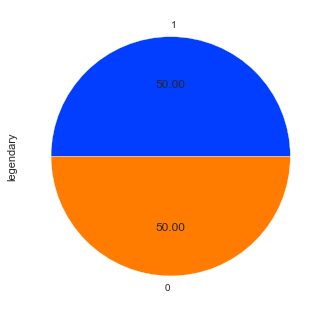

In [ ]:
print('0 --> Normal Pokemon')
print('1 --> Legendary Pokemon')
print('')
print(y_test.value_counts())
y_test.value_counts().plot.pie(autopct='%.2f');

Comprobamos el tamaño y forma de la nueva data de entrenamiento

In [ ]:
print(x_train.shape, y_train.shape)

(1316, 11) (1316,)


Comprobamos las modificaciones realizadas

In [ ]:
x_df = pd.DataFrame(x)
x_df.columns = x_columns
x_df['legendary'] = y

In [ ]:
x_df.head()

,total_points,base_experience,sp_attack,attack,sp_defense,hp,defense,egg_cycles,speed,height_m,weight_kg,legendary
0,-0.975555,-1.176599,-0.206608,-0.950174,-0.217994,-0.935118,-0.809205,-0.378083,-0.768224,-0.405329,-0.472891,0
1,-0.222686,-0.091860,0.279587,-0.527660,0.331297,-0.366701,-0.336423,-0.378083,-0.256795,-0.176322,-0.425651,0
2,0.815754,1.215390,0.927846,0.122361,1.063684,0.391189,0.338978,-0.378083,0.425110,0.587036,0.248090,0
3,-1.053438,-1.204413,-0.368672,-0.852670,-0.767285,-1.162485,-1.011825,-0.378083,-0.086319,-0.481665,-0.460500,0
4,-0.222686,-0.091860,0.279587,-0.462658,-0.217994,-0.442490,-0.505274,-0.378083,0.425110,-0.099986,-0.379186,0


In [ ]:
x_df['legendary'].value_counts()

0    940
1    940
Name: legendary, dtype: int64

Es entonces que a modo de muestra, el dataset final a trabajar es x_df al encontrarse la data estandarizada, la clase minoritaria sintetizada por SMOTE y concatenado la variable target 'y'.

## 7. Modelos de clasificación clásicos

Seran utilizados los siguientes modelos:

*   Random Forest Classifier (Utilizado como rf)
*   Support Vector Classifier (Utilizado como svc)
*   Logistic Regression (Utilizado como lr)
*   K-Nearest-Neighbor Classifier (Utilizado como knn)

Bajo Cross Validation RepeatedStratifiedKFold y se revisaran sus metricas de rendimiento o performance

### 7.1. Hiperparametros Predeterminados (Default)

Seran utilizados los siguientes modelos con parametros por default para realizar predicciones y conocer el accuracy de cada modelo

Se crea una tabla para contener los valores de accuracy por modelo para una mejor visualización

In [ ]:
#Dataframe de resultados
cols = ['Caso', 'KNN', 'SVM', 'RandomForest', 'LogisticRegression']

resul = pd.DataFrame(columns = cols)
resul.set_index("Caso", inplace = True)
resul.loc['Default'] = [0, 0, 0, 0]
resul.loc['RandomSearch'] = [0, 0, 0, 0]
resul.loc['GridSearch'] = [0, 0, 0, 0]

#Creación de Modelos
knn   = KNeighborsClassifier()
svc   = SVC()
rf    = RandomForestClassifier()
lr    = LogisticRegression()

models = [knn,svc,rf,lr]

col = 0
for model in models:
    model.fit(x_train,y_train.values.ravel())
    resul.iloc[0,col] = model.score(x_test, y_test)
    
    print('#======================================================#')
    print('Para',  cols[col + 1])
    print('#======================================================#')
    
    yv_pred = model.predict(x_test)
    default_params = model.get_params()
    
    print('Matriz de confusión:')
    print(confusion_matrix(y_test,yv_pred))   
    print(classification_report(y_test, yv_pred))
    
    print('Mejor Score conseguido por parametros default en data de test:', model.score(x_test, y_test))
    print('Hiperparametros utilizados (Default):')
    print(default_params)
    print('')
    col += 1

#======================================================#
Para KNN
#======================================================#
Matriz de confusión:
[[277   5]
 [  1 281]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       282
           1       0.98      1.00      0.99       282

    accuracy                           0.99       564
   macro avg       0.99      0.99      0.99       564
weighted avg       0.99      0.99      0.99       564

Mejor Score conseguido por parametros default en data de test: 0.9893617021276596
Hiperparametros utilizados (Default):
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

#======================================================#
Para SVM
#======================================================#
Matriz de confusión:
[[275   7]
 [  0 282]]
              precision    recall  f1-score   support

           0  

Seteamos la grilla para los metodos de GridSearch y RandomSearch (El espacio de busqueda de los hiperparametros)

In [ ]:
#K-Nearest - Neighbors
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
knn_grid = dict(n_neighbors = n_neighbors, weights = weights, metric = metric)

#Support Vector Classifier
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
svc_grid = dict(kernel = kernel, C = C, gamma = gamma)

#Random Forest
n_estimators = [10, 100, 1000,10000]
max_features = ['sqrt', 'log2']
rf_grid = dict(n_estimators = n_estimators, max_features = max_features)

#Logistic Regression
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_grid = dict(solver = solvers, penalty = penalty, C = c_values)

models = [knn, svc, rf, lr]

grids = [knn_grid, svc_grid, rf_grid, lr_grid]

### 7.2. Aplicación de algoritmo RandomSearch + Cross Validation + Metricas de rendimiento

Se utiliza el **algoritmo RandomSearch** que es **'computacionalmente mas economico'**. Se puede ver que el **tiempo requerido fue mucho menor** que para el algoritmo de GridSearch

In [ ]:
%%time

col = 0
for ind in range(0,len(models)):
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, 
                                 random_state = 1)
    n_iter_search = 3
    random_search = RandomizedSearchCV(models[col],
    param_distributions = grids[col], n_iter = n_iter_search, cv = cv, random_state = 7)
    
    random_search.fit(x_train, y_train)
    print('#======================================================#')
    print('Para',  cols[col + 1])
    print('#======================================================#')
    
    random_search_params = random_search.best_params_

    yv_pred = random_search.predict(x_test)
    
    resul.iloc[1, col] = random_search.score(x_test, y_test)

    print('Matriz de confusión:')
    print(confusion_matrix(y_test,yv_pred))
    print(classification_report(y_test, yv_pred))
    
    print('Mejor Score conseguido por RandomSearch en data de entrenamiento:', random_search.best_score_)
    print('Hiperparametros utilizados (RandomSearch best_params):')
    print(random_search_params)
    print('')  
    col += 1

#======================================================#
Para KNN
#======================================================#
Matriz de confusión:
[[277   5]
 [  0 282]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       282
           1       0.98      1.00      0.99       282

    accuracy                           0.99       564
   macro avg       0.99      0.99      0.99       564
weighted avg       0.99      0.99      0.99       564

Mejor Score conseguido por RandomSearch en data de entrenamiento: 0.9893611689413216
Hiperparametros utilizados (RandomSearch best_params):
{'weights': 'uniform', 'n_neighbors': 1, 'metric': 'manhattan'}

#======================================================#
Para SVM
#======================================================#
Matriz de confusión:
[[263  19]
 [  0 282]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       282
           1       0.94  

*Nota: Los resultados de best_score y accuracy_score van a ser diferentes por el metodo de cross validation empleado*
<br>
Para mas información: https://stackoverflow.com/questions/68952967/the-test-accuracy-score-is-higher-than-the-best-score-in-gridsearchcv

### 7.3. Aplicación de algoritmo GridSearch + Cross Validation + Metricas de rendimiento

Se utiliza el **algoritmo GridSearch** que es **'computacionalmente caro'**. Se puede ver que el **tiempo requerido fue mucho mayor** que para el algoritmo de RandomSearch

In [ ]:
%%time
import sys
import os

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = ('ignore::UserWarning,ignore::ConvergenceWarning,ignore::RuntimeWarning')

col = 0

for ind in range(0,len(models)):
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
    grid_search = GridSearchCV(estimator = models[col], 
                  param_grid = grids[col], n_jobs = -1, cv = cv,  
                  scoring = 'accuracy', error_score = 0)
    grid_search = grid_search.fit(x_train, y_train)
    print('#======================================================#')
    print('Para',  cols[col + 1])
    print('#======================================================#')
    
    grid_search_params = grid_search.best_params_

    yv_pred = grid_search.predict(x_test)
    
    resul.iloc[2, col] = grid_search.score(x_test, y_test)
    
    print('Matriz de confusión:')
    print(confusion_matrix(y_test,yv_pred))   
    print(classification_report(y_test, yv_pred))
    
    print('Mejor Score conseguido por GridSearch en data de entrenamiento:', grid_search.best_score_)
    print('Hiperparametros utilizados (GridSearch best_params):')
    print(grid_search_params)
    print('')
    col += 1

Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'


#======================================================#
Para KNN
#======================================================#
Matriz de confusión:
[[277   5]
 [  0 282]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       282
           1       0.98      1.00      0.99       282

    accuracy                           0.99       564
   macro avg       0.99      0.99      0.99       564
weighted avg       0.99      0.99      0.99       564

Mejor Score conseguido por GridSearch en data de entrenamiento: 0.9893611689413216
Hiperparametros utilizados (GridSearch best_params):
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

#======================================================#
Para SVM
#======================================================#
Matriz de confusión:
[[280   2]
 [  0 282]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       282
           1       0.99      

Siendo conocidos los errores de convergencia que involucra GridSearch en esta data, se utiliza 'warnings control' a fin de mostrar el codigo mas limpio.
<br>
Para mas información sobre warnings: https://docs.python.org/3/library/warnings.html

### 7.4. Tabla resumen

En la siguiente tabla se resume el accuracy obtenido por los distintos algoritmos de clasificación empleados

In [ ]:
resul

,KNN,SVM,RandomForest,LogisticRegression
Caso,,,,
Default,0.989362,0.987589,0.994681,0.968085
RandomSearch,0.991135,0.966312,0.994681,0.966312
GridSearch,0.991135,0.996454,0.994681,0.975177


Se pueden apreciar pequeñas mejoras en el accuracy para GridSearch con respecto a los hiperparametros por default

Buena lectura: https://pharos.sh/vision-general-de-los-metodos-de-clasificacion-en-python-con-scikit-learn/

### 7.5. ¿Cual es el mejor modelo?

Primero realizamos una comprobación al algoritmo que consiguio el **mayor accuracy** que fue **SVM** (Ganó sobre rf por un missclassified). Es notable que los modelos tuvieron una buena performance pero se ha elegido al que menos errores cometio clasificando. En este caso SVM dijo erroneamente que dos Pokemon normales son legendarios.

In [ ]:
# Validación cruzada
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
# GridSearch para regresión logistica
grid_search = GridSearchCV(estimator = svc, 
param_grid = svc_grid, n_jobs = -1, cv = cv,  
scoring = 'accuracy', error_score = 0)
# Ajuste del nuevo modelo a la data de entrenamiento
grid_clf_acc = grid_search.fit(x_train, y_train)
# Almacenamiento en una variable independiente de los mejores parametros encontrados por el metodo GridSearch
grid_search_params = grid_search.best_params_
# Almacenamiento de las predicciones sobre la data de prueba en una variable independiente
yv_pred = grid_search.predict(x_test)
# Almacenamiento del mejor score conseguido para el metodo de GridSearch (accuracy)
best_score = grid_search.score(x_test, y_test)
# Muestra de resultados
print('Los mejores parametros encontrados son:', grid_search_params)
print('El score conseguido sobre la data de prueba es:', grid_clf_acc.score(x_test, y_test))
print('')

Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'


Los mejores parametros encontrados son: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
El score conseguido sobre la data de prueba es: 0.9964539007092199



Buscamos que pokemon ha clasificado de forma equivocada el modelo

In [ ]:
# Concatenamos las predicciones obtenidas con la data target original
check = pd.concat([y_test.reset_index(), pd.DataFrame(yv_pred)], axis = 1)

# Encontramos las instancias donde el modelo se ha equivocado al clasificar
print('Legendario: 1')
print('No legendario: 0')
baba = check[np.where(check["legendary"] == check.iloc[:, -1], False, True)]
baba.rename(columns = {'legendary':'Actual', 0:'Predicción'}, inplace = True)
baba

Legendario: 1
No legendario: 0


,index,Actual,Predicción
62,410,0,1
285,967,0,1


El algoritmo se ha equivocado en los siguientes Pokemon

In [ ]:
pokemaster.iloc[410].tail()

egg_cycles    120.0
speed         180.0
height_m        1.7
weight_kg      60.8
legendary       0.0
Name: Deoxys Speed Forme, dtype: float64

In [ ]:
pokemaster.iloc[967].tail()

egg_cycles    120.0
speed          72.0
height_m        0.6
weight_kg      12.0
legendary       0.0
Name: Kubfu, dtype: float64

Efectivamente, se trataban de pokemon no legendarios que el modelo predijo como legendarios

El modelo actual se ha equivocado un total de:

In [ ]:
print('El modelo actual se ha equivocado un total de', baba.value_counts().sum(), 'veces')
print('')

El modelo actual se ha equivocado un total de 2 veces



Ahora debe explicarse los errores del modelo con la data real de cada pokemon, esta se encuentra en https://pokemondb.net/pokedex/

**Deoxys speed forme** *Pokemon Mítico*: https://pokemondb.net/pokedex/deoxys
<br>
Es un Pokemon con tasa de captura baja, crecimiento bajo, puntos de amistad bajo, sin genero y altos egg_cycles. Las anteriores son caracteristicas que poseen los Pokemon legendarios pero en particular este Pokemon **tiene unas variables muy desbalanceadas, algunas muy altas y otras muy bajas** por lo que posiblemente el modelo se ha equivocado por este motivo.
<br>
**Kubfu** *Pokemon Legendario (?)*: https://pokemondb.net/pokedex/kubfu
<br>
Es un Pokemon con tasa de captura baja, crecimiento bajo y cuenta con altos egg_cycles, las anteriores son caracteristicas que poseen los Pokemon legendarios. En particular este Pokemon **puede ser encontrado como macho o hembra** lo que no es caracteristico de los pokemon legendarios. Probablemente el modelo se ha equivocado por los motivos antes descritos. *En el dataset trabajado este Pokemon ha sido ingresado como un pokemon no legendario cuando en realidad si lo es. El modelo ha predicho que este no legendario (según la data) es legendario lo que resulta bastante curioso.*

Revisamos la matriz de confusión

Verdaderos negativos: 280 , Falsos positivos: 2 , Falsos negativos: 0 , Verdaderos positivos: 282


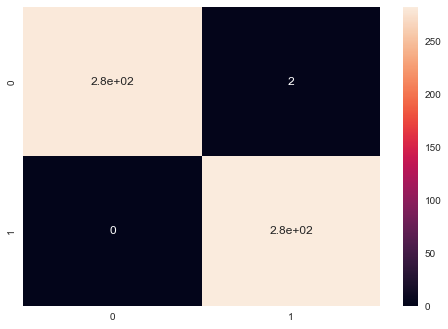

In [ ]:
cf_matrix = confusion_matrix(y_test, yv_pred)
tn, fp, fn, tp = cf_matrix.ravel()
sns.heatmap(cf_matrix, annot=True)
print('Verdaderos negativos:', tn,', Falsos positivos:', fp,', Falsos negativos:', fn,', Verdaderos positivos:', tp)

Para la matriz de confusión antes obtenida se puede ver que:
<br>
El modelo ha clasificado correctamente 280 pokemon no legendarios.
<br>
El modelo ha clasificado correctamente 280 pokemon legendarios (Recordar que no existen 280 pokemon legendarios, muchos fueron sintetizados).
<br>
El modelo ha clasificado incorrectamente 2 Pokemon normales como legendarios.
<br>
El modelo no ha clasificado ningun pokemon legendario como normal.

En vista de lo anterior, se concluye que el modelo tiene muy buena performance al identificar pokemon legendarios. Los pokemon mal clasificados se deben a sus estadisticas tan especiales que se escapan del patron, como Deoxys con sus estadisticas tan desbalanceadas al tener este formas especiales como deoxys speed, attack, etc. Y tambien a Kubfu al contar con caracteristicas de pokemon legendario pero tener genero macho y hembra que no es caracteristico de los pokemon legendarios, aunque en este ultimo revisando la base de datos en la web podemos decir que en teoria el modelo no se equivoco.

## 8. AUC-ROC Curve

Se utilizara otra metrica de evaluación para problemas de clasificación binaria como es este caso de legendario = 1, no legendario = 0. Entonces ROC Curve es la curva de probabilidad de TPR (True positive rate) contra FPR (False positive rate) y AUC viene siendo la habilidad del clasificador para distinguir entre las distintas clases (a mayor valor, mejor performance del modelo para distinguir entre clase positiva y negativa). 

### 8.1. Área under the curve (AUC)

In [ ]:
#Dataframe de resultados

#Creación de Modelos
knn   = KNeighborsClassifier()
svc   = SVC(probability = True)
rf    = RandomForestClassifier()
lr    = LogisticRegression()

# Ajustes a la data de entrenamiento
knn = knn.fit(x_train, y_train)
svc = svc.fit(x_train, y_train)
rf = rf.fit(x_train, y_train)
lr = lr.fit(x_train, y_train)

In [ ]:
# Se almacenan las probabilidades en distintas variables
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(x_test)
svm_probs = svc.predict_proba(x_test)
lr_probs = lr.predict_proba(x_test)
knn_probs = knn.predict_proba(x_test)

# Se obtiene la ultima columna de cada variable almacenada
rf_probs = rf_probs[:, 1]
svm_probs = svm_probs[:, 1]
lr_probs = lr_probs[:, 1]
knn_probs = knn_probs[:, 1]

In [ ]:
# Se calcula el AUC Score
r_auc = round(roc_auc_score(y_test, r_probs)*100,2)
rf_auc = round(roc_auc_score(y_test, rf_probs)*100,2)
svm_auc = round(roc_auc_score(y_test, svm_probs)*100,2)
log_auc = round(roc_auc_score(y_test, lr_probs)*100,2)
knn_auc = round(roc_auc_score(y_test, knn_probs)*100,2)

# Para una mejor visualización de los resultados se disponen los valores de auc score obtenidos en un dataframe
models_auc = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'Regresion Logistica', 'KNN'],
    'AUC Score': [rf_auc, svm_auc, log_auc, knn_auc],
    })
models_auc.sort_values(by='AUC Score', ascending=False)

,Model,AUC Score
0,Random Forest,99.99
1,SVM,99.85
3,KNN,99.62
2,Regresion Logistica,99.29


### 8.2. Plot de ROC Curve

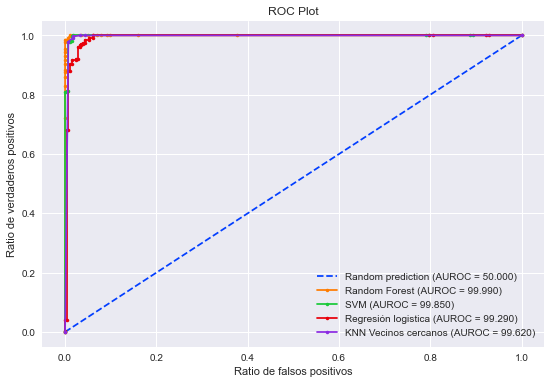

In [ ]:
result = y_test
r_fpr, r_tpr, _ = roc_curve(result, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(result, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(result, svm_probs)
lr_fpr, lr_tpr, _ = roc_curve(result, lr_probs)
knn_fpr, knn_tpr, _ = roc_curve(result, knn_probs)

f, ax = plt.subplots(figsize = (9,6))

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Regresión logistica (AUROC = %0.3f)' % log_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN Vecinos cercanos (AUROC = %0.3f)' % knn_auc)

# Titulo
plt.title('ROC Plot')
# Etiqueta de ejes
plt.xlabel('Ratio de falsos positivos')
plt.ylabel('Ratio de verdaderos positivos')
# Mostrar leyenda
plt.legend() # 
# Mostrar plot
plt.show()

## 9. Modelos de clasificación Boosting

### 9.1.  XGBoost

eXtreme Gradient Boost

In [ ]:
%%time

# Implementación de XGBC con parametros por default
xgbc = XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss')
# Ajuste del modelo a la data de prueba
xgbc.fit(x_train, y_train)
# Predicciones del modelo sobre la data de prueba
y_predict = xgbc.predict(x_test)
# Accuracy score de la data de prueba contra las predicciones
print('Accuracy score de xgbc con parametros por default:', accuracy_score(y_test, y_predict))

Accuracy score de xgbc con parametros por default: 0.9946808510638298
CPU times: user 564 ms, sys: 140 ms, total: 704 ms
Wall time: 116 ms


In [ ]:
# Matriz de confusión y reporte de clasificación
print('Matriz de confusión') 
print(confusion_matrix(y_test, y_predict))
print('Reporte de clasificación') 
print(classification_report(y_test, y_predict))

Matriz de confusión
[[279   3]
 [  0 282]]
Reporte de clasificación
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       282
           1       0.99      1.00      0.99       282

    accuracy                           0.99       564
   macro avg       0.99      0.99      0.99       564
weighted avg       0.99      0.99      0.99       564



Se puede evidenciar que el modelo con parametros por default ha conseguido los resultados de RandomForest bajo CV y GridSearch lo cual es increible.

### 9.2. Tuning de hiperparametros para XGBoost

In [ ]:
# Grilla de parametros para XGBoost

learning_rate = [0.05,0.10,0.15,0.20,0.25,0.30]
max_depth = [3, 4, 5, 6, 8, 10, 12, 15]
min_child_weight = [1, 3, 5, 7]
gamma = [0.0, 0.1, 0.2 , 0.3, 0.4]
colsample_bytree = [0.3, 0.4, 0.5 , 0.7]

# Diccionario con la grilla de parametros
xgbc_grid = dict(learning_rate = learning_rate, max_depth = max_depth,
               min_child_weight = min_child_weight, gamma = gamma,
               colsample_bytree = colsample_bytree)

In [ ]:
# Validación cruzada por RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, 
                                 random_state = 1)
n_iter_search = 3

# Implementación de RandomizedSearchCV
random_search = RandomizedSearchCV(xgbc, param_distributions = xgbc_grid,
                                   n_iter = n_iter_search, cv = cv, 
                                   random_state = 7)
# Ajuste a la data de entrenamiento   
random_search.fit(x_train, y_train);

In [ ]:
# Predicciones sobre la data de prueba
y_predict = random_search.predict(x_test)
# Accuracy score de la data de prueba contra las predicciones
print('Accuracy score de xgbc por RandomSearch:', accuracy_score(y_test, y_predict))

Accuracy score de xgbc por RandomSearch: 0.9946808510638298


No se puede evidenciar una mejora en el accuracy con el tuning de hiperparametros.

In [ ]:
# Matriz de confusión y reporte de la clasificación
print('Matriz de confusión')
print(confusion_matrix(y_test, y_predict))
print('Reporte de clasificación')
print(classification_report(y_test, y_predict))

Matriz de confusión
[[279   3]
 [  0 282]]
Reporte de clasificación
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       282
           1       0.99      1.00      0.99       282

    accuracy                           0.99       564
   macro avg       0.99      0.99      0.99       564
weighted avg       0.99      0.99      0.99       564



### 9.3. GBC

Gradient Boosting Classifier

In [ ]:
# Implementación de GBC con parametros por default
gbc = GradientBoostingClassifier()
# Ajuste del modelo a la data de entrenamiento
gbc.fit(x_train, y_train)
# Predicciones sobre la data de prueba
y_predict = gbc.predict(x_test)
# Accuracy score de la data de prueba contra las predicciones
print('Accuracy score de GBC con parametros por default:', accuracy_score(y_test, y_predict))

Accuracy score de GBC con parametros por default: 0.9911347517730497


### 9.4. Tuning de hiperparametros para GBC

In [ ]:
# Grilla de parametros para GBC
n_estimators = [5,50,250,500]
max_depth = [1,3,5,7,9]
learning_rate = [0.01,0.1,1,10,100]

# Diccionario con la grilla de parametros
gbc_grid = dict(n_estimators = n_estimators, max_depth = max_depth,
                learning_rate = learning_rate)

In [ ]:
%%time

# Validación cruzada por RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

# Implementación de GridSearchCV
grid_search = GridSearchCV(estimator = gbc, 
                  param_grid = gbc_grid, n_jobs = -1, cv = cv,  
                  scoring = 'accuracy', error_score = 0);

# Ajuste a la data de entrenamiento   
grid_search.fit(x_train, y_train);

Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'


CPU times: user 3.96 s, sys: 426 ms, total: 4.38 s
Wall time: 2min 19s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]},
             scoring='accuracy')

In [ ]:
# Predicciones sobre la data de prueba
y_predict = grid_search.predict(x_test)
# Accuracy score de la data de prueba contra las predicciones
print('Accuracy score de GBC con mejores hiperparametros:', accuracy_score(y_test, y_predict))

Accuracy score de GBC con mejores hiperparametros: 0.9911347517730497


No se puede evidenciar una mejora en el accuracy con el tuning de hiperparametros.

In [ ]:
# Matriz de confusión y reporte de la clasificación
print('Matriz de confusión')
print(confusion_matrix(y_test, y_predict))
print('Reporte de clasificación')
print(classification_report(y_test, y_predict))

Matriz de confusión
[[279   3]
 [  2 280]]
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       282
           1       0.99      0.99      0.99       282

    accuracy                           0.99       564
   macro avg       0.99      0.99      0.99       564
weighted avg       0.99      0.99      0.99       564



### 9.5. Adaboost

In [ ]:
# Implementación de Adaboost con parametros por default
adaboost = AdaBoostClassifier()
# Ajuste del modelo a la data de entrenamiento
adaboost.fit(x_train, y_train)
# Predicciones sobre la data de prueba
y_predict = adaboost.predict(x_test)
# Accuracy score de la data de prueba contra las predicciones
print('Accuracy score de adaboost con parametros por default:', accuracy_score(y_test, y_predict))

Accuracy score de adaboost con parametros por default: 0.9929078014184397


In [ ]:
# Parametros utilizados por default en el modelo
adaboost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

### 9.6. Tuning de hiperparametros para Adaboost

In [ ]:
# Grilla de parametros para Adaboost
n_estimators = [50, 100, 200, 300]
learning_rate = [(0.97 + x / 100) for x in range(0, 8)]
algorithm = ['SAMME', 'SAMME.R']

# Diccionario con la grilla de parametros
adaboost_grid = dict(n_estimators = n_estimators)

In [ ]:
# Validación cruzada por RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, 
                                 random_state = 1)
n_iter_search = 3

# Implementación de GridSearchCV
grid_search = GridSearchCV(estimator = adaboost, 
                  param_grid = adaboost_grid, n_jobs = -1, cv = cv,  
                  scoring = 'accuracy', error_score = 0);
# Ajuste a la data de entrenamiento   
grid_search.fit(x_train, y_train);

In [ ]:
# Predicciones sobre la data de prueba
y_predict = grid_search.predict(x_test)
# Accuracy score de la data de prueba contra las predicciones
print('Accuracy score de adaboost con mejores hiperparametros obtenidos por GridSearch:', accuracy_score(y_test, y_predict))

Accuracy score de adaboost con mejores hiperparametros obtenidos por GridSearch: 0.9911347517730497


El tuning de hiperparametros para Adaboost no esta consiguiendo un mejor resultado por lo que se requiere una busqueda mas extensiva e intensiva de hiperparametros o aceptar el resultado obtenido por el modelo con parametros por defecto.

In [ ]:
# Matriz de confusión y reporte de la clasificación
print('Matriz de confusión')
print(confusion_matrix(y_test, y_predict))
print('Reporte de clasificación')
print(classification_report(y_test, y_predict))

Matriz de confusión
[[280   2]
 [  3 279]]
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       282
           1       0.99      0.99      0.99       282

    accuracy                           0.99       564
   macro avg       0.99      0.99      0.99       564
weighted avg       0.99      0.99      0.99       564



## 10. Conclusiones

Se ha implementado lo visto en el curso de Data Science e incluso más. No es una tarea sencilla elegir un algoritmo ganador con los resultados obtenidos que se encuentran muy cerrados (resultados muy buenos con pocas diferencias). Entrando a escarbar un poco entre los resultados se puede ver que el modelo de mejor desempeño fue SVC bajo GridSearch para la identificación de los mejores hiperparametros, aqui hubo un detalle muy notable, que clasificó un pokemon no legendario según la data pero que realmente si era un pokemon legendario (Kubfu), pasando por alto lo anterior sin considerarlo una equivocación del modelo se puede decir que el modelo tuvo un desempeño casi perfecto en el que solo se ha equivocado con un pokemon de caracteristicas completamente desbalanceadas (Deoxys Speed Form) por lo que el error es completamente comprensible. No quedandose atras, los dos modelos de mejor desempeño seguidos de SVC son RandomForest y XGBoost que obtuvieron el mismo resultado donde ambos clasificaron de forma erronea 1 Pokemon más que el modelo de SVC.
<br>
Como grupo estamos muy contentos con los resultados obtenidos, todo el proceso que se ha seguido para lograr dichos resultados y lo que se ha aprendido durante el desarrollo del proyecto y la cursada.